# Machine Learning / Aprendizagem Automática

## Diogo Soares, André Falcão and Sara C. Madeira, 2020/21

# ML Project  - Learning about Donations

## Logistics

**Students are encouraged to work in teams of 3 people**. 

Projects with smaller teams are allowed, in exceptional cases, but will not have better grades for this reason. 

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of December, 18th (last day before Christmas holidays).** 

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. The notebook is both the solution and the report.**

**Decisions should be fundamented and results should be critically discussed.**

## Tools

The team should use [Python 3](https://www.python.org) and [Jupyter Notebook](http://jupyter.org), together with **[Scikit-learn](http://scikit-learn.org/stable/)**, **[Orange3](https://orange.biolab.si)**, or **both**.

**[Orange3](https://orange.biolab.si)** can be used through its **[programmatic version](https://docs.orange.biolab.si/3/data-mining-library/)**, by importing and using its packages, or throught its **workflow version**. 

**It is up to the team to decide when to use Scikit-learn, Orange, or both.**

In this context, your Jupyter notebook might have a mix of code, results, text explanations, workflow figures, etc. 

In case you use Orange/workflows for some tasks you should also deliver the workflow files and explain the options taken in each widget in your notebook.

**You can use this noteboook and the sections below as template for your work.**

## Task 0 (Know your Data) - Exploratory Data Analysis

In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0.1. Loading Data

In [464]:
donors = pd.read_csv("Donors_dataset.csv", header=0, na_values="?")

In [465]:
pd.set_option('display.max_columns', None)
donors

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,NaN,NaN,.,H,M,2.0,0,P,0,NaN,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2.0,45,H,M,7.0,0,P,0,3.0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1.0,11,H,F,5.0,0,P,0,9.0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2.0,4,H,F,6.0,1,B,0,4.0,1688,153,3,16342,0,25,32,42,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2.0,49,U,F,2.0,1,B,8,5.0,514,328,90,12107,0,33,36,37,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,0,NaN,191687,89,66.0,1,U,1.0,3,H,F,4.0,1,B,241,7.0,1224,411,53,17457,1,24,34,41,0,0,A,2,0.154,15.00,0.167,15.00,2,1,18.0,18,50,103.0,6,17.17,22.0,25.0,3.0,15.0,6,13,18,81,17.17,3
19368,0,NaN,191710,137,77.0,1,C,1.0,24,H,F,5.0,1,B,240,7.0,778,388,67,18431,3,36,28,56,1,1,S,3,0.200,9.00,0.200,10.00,4,2,21.0,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13
19369,0,NaN,191746,29,NaN,1,S,1.0,11,U,M,1.0,1,P,0,NaN,383,203,74,11971,0,41,20,58,0,0,N,1,0.000,0.00,0.000,0.00,0,0,NaN,5,14,15.0,1,15.00,0.0,15.0,15.0,15.0,3,9,23,23,15.00,0
19370,0,NaN,191775,129,78.0,1,NaN,NaN,.,U,M,6.0,1,B,0,9.0,1861,421,84,22294,0,0,0,0,1,14,A,1,0.053,25.00,0.000,0.00,1,0,23.0,31,99,440.0,24,18.33,20.0,25.0,5.0,25.0,7,24,8,129,18.33,11


## Dataset

The dataset to be analysed is **`Donors_dataset.csv`**, made available together with this project description. This dataset, downloaded from [Kaggle](https://www.kaggle.com), contains selected data from the following dataset: [Donors-Prediction](https://www.kaggle.com/momohmustapha/donorsprediction/). 


**In this project, your team is supposed to use only tabular data (not Images or Image Metadata) and see how far you can go in predicting donations and understanding the donors. You should use both supervised and unsupervised learning to tackled 2 tasks:**

1. **Task 1 (Supervised Learning) - Predicting Donation and Donation Type**
2. **Task 2 (Unsupervised Learning) - Characterizing Donors**

The **`Donors_dataset.csv`** you should learn from has **19.372 instances** described by **50 data fields** that you might use as **categorical/numerical features** 

### File Descriptions

* **Donors_dataset.csv** - Tabular/text data to be used in the machine learning tasks.


### Data Fields

* **CARD_PROM_12** - number of card promotions sent to the individual by the charitable organization in the past 12 months
* **CLUSTER_CODE** - one of 54 possible cluster codes, which are unique in terms of socioeconomic status, urbanicity, ethnicity, and other demographic characteristics
* **CONTROL_NUMBER** - unique identifier of each individual
* **DONOR_AGE** - age as of last year's mail solicitation
* **DONOR_GENDER** - actual or inferred gender
* **FILE_AVG_GIFT** - this variable is identical to LIFETIME_AVG_GIFT_AMT
* **FILE_CARD_GIFT** - lifetime average donation (in \\$) from the individual in response to all card solicitations from the charitable organization
* **FREQUENCY_STATUS_97NK** - based on the period of recency (determined by RECENCY_STATUS_96NK), which is the past 12 months for all groups except L and E. L and E are 13–24 months ago and 25–36 months ago, respectively: 1 if one donation in this period, 2 if two donations in this period, 3 if three donations in this period, and 4 if four or more donations in this period.
* **HOME_OWNER** - H if the individual is a homeowner, U if this information is unknown
* **INCOME_GROUP** - one of 7 possible income level groups based on a number of demographic characteristics
* **IN_HOUSE** - 1 if the individual has ever donated to the charitable organization's In House program, 0 if not
* **LAST_GIFT_AMT** - amount of the most recent donation from the individual to the charitable organization
* **LIFETIME_AVG_GIFT_AMT** - lifetime average donation (in \\$) from the individual to the charitable organization
* **LIFETIME_CARD_PROM** - total number of card promotions sent to the individual by the charitable organization
* **LIFETIME_GIFT_AMOUNT** - total lifetime donation amount (in \\$) from the individual to the charitable organization
* **LIFETIME_GIFT_COUNT** - total number of donations from the individual to the charitable organization
* **LIFETIME_GIFT_RANGE** - maximum donation amount from the individual minus minimum donation amount from the individual
* **LIFETIME_MAX_GIFT_AMT** - maximum donation amount (in \\$) from the individual to the charitable organization
* **LIFETIME_MIN_GIFT_AMT** - minimum donation amount (in \\$) from the individual to the charitable organization
* **LIFETIME_PROM** - total number of promotions sent to the individual by the charitable organization
* **MEDIAN_HOME_VALUE** - median home value (in 100\\$) as determined by other input variables
* **MEDIAN_HOUSEHOLD_INCOME** - median household income (in 100\\$) as determined by other input variables
* **MONTHS_SINCE_FIRST_GIFT** - number of months since the first donation from the individual to the charitable organization
* **MONTHS_SINCE_LAST_GIFT** - number of months since the most recent donation from the individual to the charitable organization
* **MONTHS_SINCE_LAST_PROM_RESP** - number of months since the individual has responded to a promotion by the charitable organization
* **MONTHS_SINCE_ORIGIN** - number of months that the individual has been in the charitable organization's database
* **MOR_HIT_RATE** - total number of known times the donor has responded to a mailed solicitation from a group other than the charitable organization
* **NUMBER_PROM_12** - number of promotions (card or other) sent to the individual by the charitable organization in the past 12 months
* **OVERLAY_SOURCE** - the data source against which the individual was matched: M if Metromail, P if Polk, B if both
* **PCT_ATTRIBUTE1** - percent of residents in the neighborhood in which the individual lives that are males and active military
* **PCT_ATTRIBUTE2** - percent of residents in the neighborhood in which the individual lives that are males and veterans
* **PCT_ATTRIBUTE3** - percent of residents in the neighborhood in which the individual lives that are Vietnam veterans
* **PCT_ATTRIBUTE4** - percent of residents in the neighborhood in which the individual lives that are WWII veterans
* **PCT_OWNER_OCCUPIED** - percent of owner-occupied housing in the neighborhood in which the individual lives
* **PEP_STAR** - 1 if individual has ever achieved STAR donor status, 0 if not
* **PER_CAPITA_INCOME** - per capita income (in \\$) of the neighborhood in which the individual lives
* **PUBLISHED_PHONE** - 1 if the individual's telephone number is published, 0 if not
* **RECENCY_STATUS_96NK** - recency status as of two years ago: A if active donor, S if star donor, N if new donor, E if inactive donor, F if first time donor, L if lapsing donor
* **RECENT_AVG_CARD_GIFT_AMT** - average donation from the individual in response to a card solicitation from the charitable organization since four years ago
* **RECENT_AVG_GIFT_AMT** - average donation (in \\$) from the individual to the charitable organization since four years ago
* **RECENT_CARD_RESPONSE_COUNT** - number of times the individual has responded to a card solicitation from the charitable organization since four years ago
* **RECENT_CARD_RESPONSE_PROP** - proportion of responses to the individual to the number of card solicitations from the charitable organization since four years ago
* **RECENT_RESPONSE_COUNT** - number of times the individual has responded to a promotion (card or other) from the charitable organization since four years ago
* **RECENT_RESPONSE_PROP** - proportion of responses to the individual to the number of (card or other) solicitations from the charitable organization since four years ago
* **RECENT_STAR_STATUS** - 1 if individual has achieved star donor status since four years ago, 0 if not
* **SES** - one of 5 possible socioeconomic codes classifying the neighborhood in which the individual lives
* **TARGET_B** - 1 if individual donated in response to last year's 97NK mail solicitation from the charitable organization, 0 if individual did not
* **TARGET_D** - amount of donation (in \\$) from the individual in response to last year's 97NK mail solicitation from the charitable organization
* **URBANICITY** - classification of the neighborhood in which the individual lives: U if urban, C if city, S if suburban, T if town, R if rural, ? if missing
* **WEALTH_RATING** - one of 10 possible wealth rating groups based on a number of demographic characteristics


### Donation TYPE

You are supposed to create a new column/feature named `DONATION_TYPE`, whose values describe ranges of the donation amount (DA) reported in feature `TARGET_D`:
* `A` - DA >= 50
* `B` - 20 <= DA < 50 
* `C` - 13 <= DA < 20
* `D` - 10 <= DA < 13
* `E` - DA < 10


### **Important Notes on Data Cleaning and Preprocessing**

   1. Data can contain **errors/typos**, whose correction might improve the analysis.
   2. Some features can contain **many values**, whose grouping in categories (aggregation into bins) might improve the analysis.
   3. Data can contain **missing values**, that you might decide to fill. You might also decide to eliminate instances/features with high percentages of missing values.
   4. **Not all features are necessarily important** for the analysis.
   5. Depending on the analysis, **some features might have to be excluded**.
   6. Class distribution is an important characteristic of the dataset that should be checked. **Class imbalance** might impair machine learning. 
  
Some potentially useful links:

* Data Cleaning and Preprocessing in Scikit-learn: https://scikit-learn.org/stable/modules/preprocessing.html#
* Data Cleaning and Preprocessing in Orange: https://docs.biolab.si//3/visual-programming/widgets/data/preprocess.html
* Dealing with imbalance datasets: https://pypi.org/project/imbalanced-learn/ and https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t7

## 0.2. Understanding Data

In this task you should **understand better the features**, their distribution of values, potential errors, etc and plan/describe what data preprocessing steps should be performed next. Very important also is to check the distribution of values in the target (class distribution). 

Here you can find a notebook with some examples of what you can do in **Exploratory Data Analysis**: https://www.kaggle.com/artgor/exploration-of-data-step-by-step/notebook. You can also use Orange widgets for this.

In [466]:
donors.shape

(19372, 50)

There are a total of 19372 entries in the dataset and 50(!) features.

In [467]:
donors.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,SES,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,18918.000000,14980.000000,19372.000000,19372.000000,10562.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.00000,19372.000000,19372.000000,19126.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,1.903425,3.907543,0.497729,3.361656,5.005397,1079.871929,341.970215,69.698999,15857.334452,1.029011,30.573921,29.603293,32.852467,0.504439,0.931138,1.983998,0.190127,15.365396,0.230808,11.68547,3.043103,1.730539,19.038900,18.668078,47.570514,104.425716,9.979765,12.858338,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,0.749215,1.864796,0.500008,9.503481,2.815386,960.753448,164.207807,21.711019,8710.630390,4.918297,11.421471,15.120360,17.839765,0.499993,2.545585,1.099346,0.113947,10.167485,0.186230,10.83412,2.046401,1.535521,3.415559,8.558778,22.950158,105.722460,8.688163,8.787758,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-12.000000,2.000000,5.000000,15.000000,1.000000,1.360000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,518.000000,232.000000,60.000000,10869.000000,0.000000,25.000000,20.000000,21.000000,0.000000,0.000000,1.000000,0.105000,10.000000,0.100000,5.00000,2.000000,1.000000,17.000000,11.000000,28.000000,42.000000,4.000000,8.000000,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,2.000000,4.000000,0.000000,0.000000,5.000000,747.000000,311.000000,76.000000,13816.500000,0.000000,31.000000,29.000000,32.000000,1.000000,0.000000,2.000000,0.167000,14.000000,0.200000,10.14000,3.000000,1.000000,18.000000,18.000000,47.000000,79.000000,8.000000,11.200000,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,2.000000,5.000000,1.000000,3.000000,7.000000,1227.000000,417.000000,85.000000,18308.250000,0.000000,37.000000,39.000000,43.000000,1.000000,1.000000,3.000000,0.250000,20.000000,0.333000,16.00000,4.000000,2.000000,21.000000,26.000000,64.000000,132.000000,14.000000,15.000000,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,4.000000,7.000000,1.0000

After a first look at the dataset and its feature, we can split the variables in two main groups:
+ **Demographic:** these are related to the donor and their demographics. `DONOR_AGE`, `DONOR_GENDER`, `INCOME_GROUP`, `MEDIAN_HOUSEHOLD_INCOME`, `URBANICITY` are some examples of features that pertain to the donor and their social and economic reality.
+ **Donation:** these are related to the donor's donation history and other charity functional features: `PEP_STAR`, `IN_HOUSE`, `PUBLISHED_PHONE`, `FREQUENCY_STATUS_97NK` are some examples of this type.

In [468]:
donors['TARGET_D'].describe()

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: TARGET_D, dtype: float64

In [469]:
donors['TARGET_B'].describe()

count    19372.000000
mean         0.250000
std          0.433024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
Name: TARGET_B, dtype: float64

The count on the two target variables is different, meaning there are NA values in the dataset. Also, `TARGET_B` should be a categorical variable and is currently a float. That will have to be addressed in the future.

### Adding DONATION_TYPE to the dataset

Creating a new column/feature named `DONATION_TYPE`, whose values describe ranges of the donation amount (DA) reported in feature `TARGET_D`:
* `A` - DA >= 50
* `B` - 20 <= DA < 50 
* `C` - 13 <= DA < 20
* `D` - 10 <= DA < 13
* `E` - DA < 10

In [470]:
# create a list for our conditions
conditions = [
    (donors['TARGET_D']  >= 50),
    (donors['TARGET_D'] < 50) & (donors['TARGET_D']  >= 20),
    (donors['TARGET_D'] < 20) & (donors['TARGET_D']  >= 13),
    (donors['TARGET_D'] < 13) & (donors['TARGET_D']  >= 10),
    (donors['TARGET_D'] < 10)
    ]

# create a list of the values we want to assign for each condition
values = ['A', 'B', 'C', 'D', 'E']

# create a new column and use np.select to assign values to it using our lists as arguments
donors['DONATION_TYPE'] = np.select(conditions, values, default=np.nan)

In [471]:
donors['DONATION_TYPE'].unique()

array(['nan', 'D', 'E', 'C', 'B', 'A'], dtype=object)

### Addressing superfluous features

Looking at the features' descriptions, we can immediately point out some that are meaningless for the problem at hand:
+ `CONTROL_NUMBER`: this is a unique identifier for each donor, it has no impact in the donation.
+ `PCT_ATRIBUTE` 1 to 4: unlike other neighbourhood info on the dataset, these features seem irrelevant to what we want to achieve and only create noise.
+ `FILE_AVG_GIFT` and `LIFETIME_AVG_GIFT_AMT`: this features are identical, according to the dataset info. Worth it to check and confirm.

#### CONTROL_NUMBER

In [472]:
donors['CONTROL_NUMBER'].nunique()

19372

`CONTROL_NUMBER` values are equal to the total number of rows, meaning they are all unique - we can drop this column.

In [473]:
donors = donors.drop(["CONTROL_NUMBER"], axis=1)

#### FILE_AVG_GIFT and LIFETIME_AVG_GIFT_AMT

In [474]:
donors["FILE_AVG_GIFT"].head()

0     8.49
1    14.72
2    16.75
3    11.76
4     8.83
Name: FILE_AVG_GIFT, dtype: float64

In [475]:
donors["LIFETIME_AVG_GIFT_AMT"].head()

0     8.49
1    14.72
2    16.75
3    11.76
4     8.83
Name: LIFETIME_AVG_GIFT_AMT, dtype: float64

In [476]:
life_avg = list(set(donors["LIFETIME_AVG_GIFT_AMT"]))
file_avg = list(set(donors["FILE_AVG_GIFT"]))

equal = True
for i in range(len(life_avg)):
    if life_avg[i] != file_avg[i]:
        equal = False
        print("Features are NOT the same!")
        
if equal == True:
    print("Features are exactly the same! Remove one.")

Features are exactly the same! Remove one.


All the values in `LIFETIME_AVG_GIFT_AMT` and `FILE_AVG_GIFT` are equal! We can safely remove one - in this case, we will remove `FILE_AVG_GIFT`.

In [477]:
donors = donors.drop(["FILE_AVG_GIFT"], axis=1)

#### PCT_ATTRIBUTE features

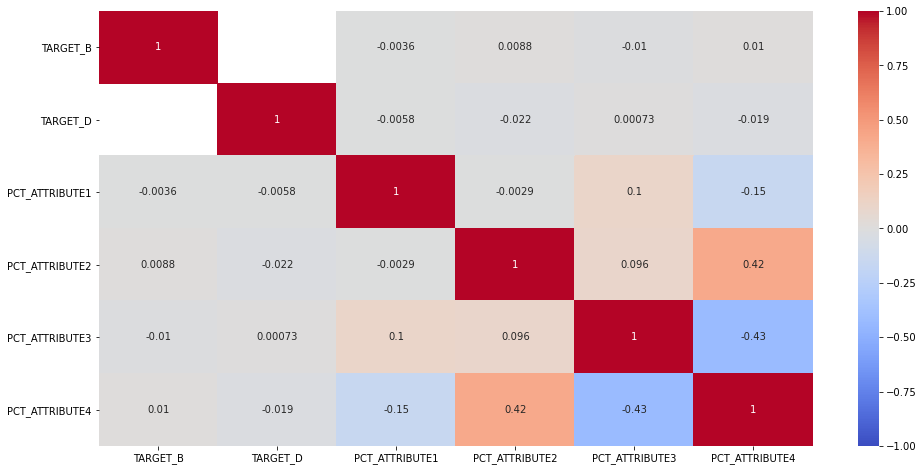

In [478]:
cols = donors[["TARGET_B", "TARGET_D", "PCT_ATTRIBUTE1", "PCT_ATTRIBUTE2", "PCT_ATTRIBUTE3", "PCT_ATTRIBUTE4"]]
plt.figure(figsize=(16,8))
sns.heatmap(cols.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

<AxesSubplot:xlabel='TARGET_B', ylabel='PCT_ATTRIBUTE1'>

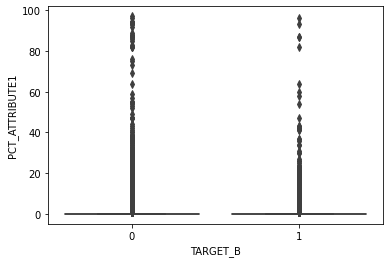

In [479]:
# Evaluating PCT_ATTRIBUTE1 for donors and non-donors
sns.boxplot(x="TARGET_B", y="PCT_ATTRIBUTE1", data=donors)

<AxesSubplot:xlabel='TARGET_B', ylabel='PCT_ATTRIBUTE2'>

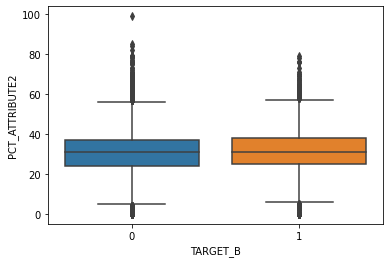

In [480]:
# Evaluating PCT_ATTRIBUTE2 for donors and non-donors
sns.boxplot(x="TARGET_B", y="PCT_ATTRIBUTE2", data=donors)

<AxesSubplot:xlabel='TARGET_B', ylabel='PCT_ATTRIBUTE3'>

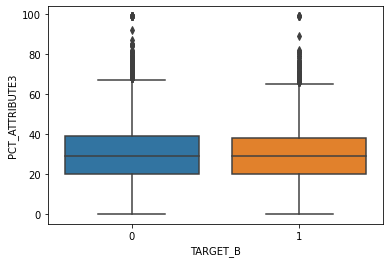

In [481]:
# Evaluating PCT_ATTRIBUTE3 for donors and non-donors
sns.boxplot(x="TARGET_B", y="PCT_ATTRIBUTE3", data=donors)

<AxesSubplot:xlabel='TARGET_B', ylabel='PCT_ATTRIBUTE4'>

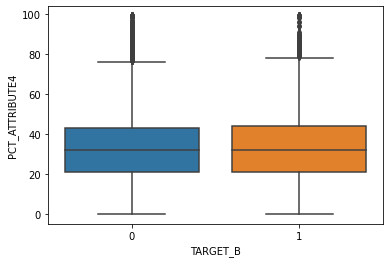

In [482]:
# Evaluating PCT_ATTRIBUTE4 for donors and non-donors
sns.boxplot(x="TARGET_B", y="PCT_ATTRIBUTE4", data=donors)

The `PCT_ATTRIBUTE` features show practically no correlation with the target features. There doesn't seem to be any difference in these features for donors and non-donors. We can drop them without losing any information.

In [483]:
donors = donors.drop(["PCT_ATTRIBUTE1", "PCT_ATTRIBUTE2", "PCT_ATTRIBUTE3", "PCT_ATTRIBUTE4"], axis=1)

Another course of action we could have taken is to convert these 4 features into a single feature: something like "percentage of residents in the neighborhood in which the individual lives that are military or veterans". However, the question still remains: is this really important to explain if someone is more likely to donate or not? If this were a veteran help association we could see that having an impact. As it stands, with no info about the donation's objectives, we still feel like this information is just noise for future models.

### Addressing missing values

In [484]:
# Counting the number of NaNs in each column
donors.isnull().sum()

TARGET_B                           0
TARGET_D                       14529
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                       454
SES                              454
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
FREQUENCY_STATUS_97NK              0
RECENT_RESPONSE_PROP               0
RECENT_AVG_GIFT_AMT                0
RECENT_CARD_RESPONSE_PROP          0
RECENT_AVG_CARD_GIFT_AMT           0
R

`TARGET_D` shows 14529 NA values! We can remove some of these because this feature is directly correlated with `TARGET_B`:
+ if someone didn't donate then TARGET_B = 0 and, obviously, TARGET_D = 0. Also, if someone has a non-null value for `TARGET_D` then `TARGET_B` is 1.
+ For the people where `TARGET_B` = 1 and `TARGET_B` is null we can impute the median as it will not affect the distribution of the data.

In [485]:
activeDonors = donors[donors["TARGET_B"]==1]
activeDonors["TARGET_D"].isnull().sum()

0

There are 0 NA values for active donors. This means that all the NA's belong to rows where `TARGET_B` = 0. `TARGET_D` is not a target variable so we will leave these values as NA's.

Looking at the rest of the features, we can see that `WEALTH_RATING`, `INCOME_GROUP`, `SES`, `DONOR_AGE` and `URBANICITY` all have a high number of NA values, with the first three being the most problematic.

Let's start with `DONOR_AGE`. We can impute the median for this variable for every NA. This is an 'easy' fix that does not affect the variable distribution.

In [486]:
ageMedian = donors["DONOR_AGE"].median()
donors["DONOR_AGE"] = donors["DONOR_AGE"].fillna(ageMedian)
donors["DONOR_AGE"].isnull().sum()

0

In [487]:
donors.isnull().sum()

TARGET_B                           0
TARGET_D                       14529
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                          0
IN_HOUSE                           0
URBANICITY                       454
SES                              454
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
FREQUENCY_STATUS_97NK              0
RECENT_RESPONSE_PROP               0
RECENT_AVG_GIFT_AMT                0
RECENT_CARD_RESPONSE_PROP          0
RECENT_AVG_CARD_GIFT_AMT           0
R

Next we take a look at `INCOME_GROUP` and `WEALTH_RATING`.

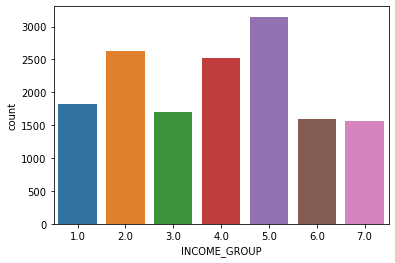

In [488]:
sns.countplot(x=donors['INCOME_GROUP'])
plt.show()

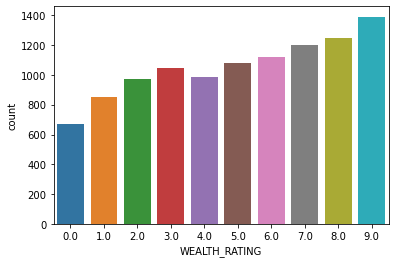

In [489]:
sns.countplot(x=donors['WEALTH_RATING'])
plt.show()

These features are a lot more complicated. As they are categorical values, we could, for example, impute the mode to all missing values. However, as the number of missing values are too high, this would severely impact the dataset and skew the ratings towards the most frequent rating. We also can't just remove the rows with NA values because that would cut almost half of the dataset.

A possible solution would be to evaluate if these two features are needed. There could be features that show the same type of information as these two. In this case, we are looking at features that convey economic information about the donors.

Looking at the dataset, that are other features with economic information: `PER_CAPITA_INCOME`, `MEDIAN_HOUSEHOLD_INCOME` and `SES`. It can be interesting to look at the correlation between `WEALTH_RATING` and `INCOME_GROUP` and these features.

In [490]:
donors.corrwith(donors["WEALTH_RATING"]).sort_values(ascending=False).head()

WEALTH_RATING              1.000000
MEDIAN_HOUSEHOLD_INCOME    0.603792
PER_CAPITA_INCOME          0.521337
INCOME_GROUP               0.419194
MEDIAN_HOME_VALUE          0.390796
dtype: float64

In [491]:
donors.corrwith(donors["INCOME_GROUP"]).sort_values(ascending=False).head()

INCOME_GROUP               1.000000
MEDIAN_HOUSEHOLD_INCOME    0.428270
WEALTH_RATING              0.419194
PER_CAPITA_INCOME          0.354530
MEDIAN_HOME_VALUE          0.323530
dtype: float64

<AxesSubplot:xlabel='WEALTH_RATING', ylabel='PER_CAPITA_INCOME'>

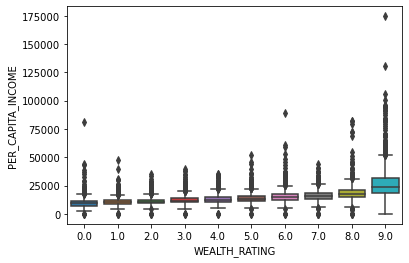

In [492]:
sns.boxplot(x = 'WEALTH_RATING', y = 'PER_CAPITA_INCOME', data = donors)

<AxesSubplot:xlabel='WEALTH_RATING', ylabel='MEDIAN_HOUSEHOLD_INCOME'>

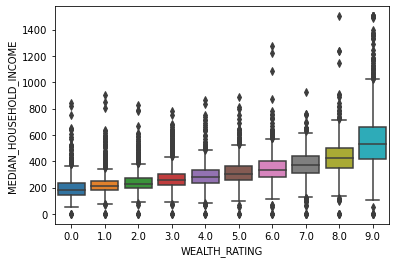

In [493]:
sns.boxplot(x = 'WEALTH_RATING', y = 'MEDIAN_HOUSEHOLD_INCOME', data = donors)

`PER_CAPITA_INCOME` and `MEDIAN_HOUSEHOLD_INCOME`seem to display the same information as `WEALTH_RATING`.

<AxesSubplot:xlabel='INCOME_GROUP', ylabel='PER_CAPITA_INCOME'>

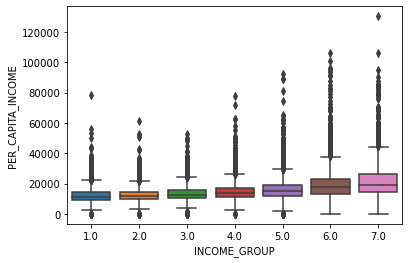

In [494]:
sns.boxplot(x = 'INCOME_GROUP', y = 'PER_CAPITA_INCOME', data = donors)

<AxesSubplot:xlabel='INCOME_GROUP', ylabel='MEDIAN_HOUSEHOLD_INCOME'>

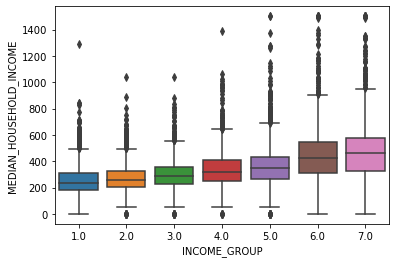

In [495]:
sns.boxplot(x = 'INCOME_GROUP', y = 'MEDIAN_HOUSEHOLD_INCOME', data = donors)

The same can be observed when we look at `INCOME_GROUP`. This means we can remove `WEALTH_RATING` and `INCOME_GROUP` from the dataset and still keep the information that these two features convey.

In [496]:
donors = donors.drop(["INCOME_GROUP", "WEALTH_RATING"], axis=1)

Moving on to `MONTHS_SINCE_LAST_PROM_RESP`, we saw before in the dataset describe that this feature had negative values. From the dataset description we can see that this feature represents the number of months since the donor's last response. That means that there shouldn't be any negative values.

In [497]:
donors["MONTHS_SINCE_LAST_PROM_RESP"].describe()

count    19126.000000
mean        19.038900
std          3.415559
min        -12.000000
25%         17.000000
50%         18.000000
75%         21.000000
max         36.000000
Name: MONTHS_SINCE_LAST_PROM_RESP, dtype: float64

We should see how many negative values there are.

In [498]:
negSum = 0
for val in donors["MONTHS_SINCE_LAST_PROM_RESP"]:
    if val < 0:
        negSum += 1

print("There are", str(negSum), "negative values in this feature!")

There are 8 negative values in this feature!


There are 8 negative values in `MONTHS_SINCE_LAST_PROM_RESP`. As this is one of the features that contains null values, we can treat this values like we will do with nulls. We will choose to replace all of the values by the feature's median: 18.

In [499]:
monthMedian = donors["MONTHS_SINCE_LAST_PROM_RESP"].median()
donors["MONTHS_SINCE_LAST_PROM_RESP"] = donors["MONTHS_SINCE_LAST_PROM_RESP"].fillna(monthMedian)
donors["MONTHS_SINCE_LAST_PROM_RESP"].isnull().sum()

0

In [500]:
for i in donors.index:
    if donors["MONTHS_SINCE_LAST_PROM_RESP"][i] < 0:
        donors["MONTHS_SINCE_LAST_PROM_RESP"][i] = monthMedian

C:\Users\filip\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [501]:
donors["MONTHS_SINCE_LAST_PROM_RESP"].describe()

count    19372.000000
mean        19.037322
std          3.343699
min          2.000000
25%         17.000000
50%         18.000000
75%         21.000000
max         36.000000
Name: MONTHS_SINCE_LAST_PROM_RESP, dtype: float64

It seems that there are no more missing or negative values in `MONTHS_SINCE_LAST_PROM_RESP`.

Now the last NA values are in `MONTHS_SINCE_LAST_PROM_RESP`, `URBANICITY` and `SES`. These are a very small number  when compared with the other problematic features and with the total number of observations in the dataset. If we remove them we won't be losing that much information.

**OTHER OPTIONS:** 
+ try to find similar donors to the ones that have these values as NA and infer the missing values.
+ Create a new group 'UNKNOWN' and fill these missing values with that group.

In [502]:
colsNA = ["MONTHS_SINCE_LAST_PROM_RESP", "SES", "URBANICITY"]
donors = donors.dropna(how='any', subset=colsNA)

In [503]:
donors.isnull().sum()

TARGET_B                           0
TARGET_D                       14215
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                          0
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
FREQUENCY_STATUS_97NK              0
RECENT_RESPONSE_PROP               0
RECENT_AVG_GIFT_AMT                0
RECENT_CARD_RESPONSE_PROP          0
RECENT_AVG_CARD_GIFT_AMT           0
RECENT_RESPONSE_COUNT              0
RECENT_CARD_RESPONSE_COUNT         0
M

In [504]:
donors.reset_index(inplace=True, drop=True)

### Addressing Data Types

In [505]:
donors

,TARGET_B,TARGET_D,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE
0,1,10.0,137,79.0,0,R,2.0,45,H,M,0,P,0,334,212,72,10385,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,12,D
1,0,NaN,113,75.0,0,S,1.0,11,H,F,0,P,0,2388,405,63,30855,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16,nan
2,0,NaN,92,60.0,0,U,2.0,4,H,F,1,B,0,1688,153,3,16342,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,12,nan
3,0,NaN,101,74.0,0,R,2.0,49,U,F,1,B,8,514,328,90,12107,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,3,nan
4,0,NaN,101,63.0,0,U,3.0,8,U,M,0,P,0,452,182,51,6851,0,0,A,4,0.200,8.33,0.125,10.00,3,1,19.0,22,59,128.0,22,5.82,7.0,10.0,3.0,10.0,9,20,19,91,6,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18913,0,NaN,137,64.0,1,C,1.0,23,U,F,1,B,240,2152,389,29,28753,1,1,S,2,0.231,29.00,0.111,36.00,3,1,16.0,29,65,231.0,14,16.50,31.0,36.0,5.0,25.0,5,9,16,121,7,nan
18914,0,NaN,137,85.0,1,T,2.0,40,U,M,1,B,240,715,399,89,14796,1,1,S,3,0.222,5.00,0.125,5.00,4,1,15.0,31,72,101.0,19,5.32,7.0,10.0,3.0,5.0,5,12,15,126,13,nan
18915,0,NaN,89,66.0,1,U,1.0,3,H,F,1,B,241,1224,411,53,17457,0,0,A,2,0.154,15.00,0.167,15.00,2,1,18.0,18,50,103.0,6,17.17,22.0,25.0,3.0,15.0,6,13,18,81,3,nan
18916,0,NaN,137,77.0,1,C,1.0,24,H,F,1,B,240,778,388,67,18431,1,1,S,3,0.200,9.00,0.200,10.00,4,2,21.0,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,13,nan


In [506]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18918 entries, 0 to 18917
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     18918 non-null  int64  
 1   TARGET_D                     4703 non-null   float64
 2   MONTHS_SINCE_ORIGIN          18918 non-null  int64  
 3   DONOR_AGE                    18918 non-null  float64
 4   IN_HOUSE                     18918 non-null  int64  
 5   URBANICITY                   18918 non-null  object 
 6   SES                          18918 non-null  float64
 7   CLUSTER_CODE                 18918 non-null  object 
 8   HOME_OWNER                   18918 non-null  object 
 9   DONOR_GENDER                 18918 non-null  object 
 10  PUBLISHED_PHONE              18918 non-null  int64  
 11  OVERLAY_SOURCE               18918 non-null  object 
 12  MOR_HIT_RATE                 18918 non-null  int64  
 13  MEDIAN_HOME_VALU

We can identify some problems with the datatypes :
+ `TARGET_B`, `IN_HOUSE`, `PUBLISHED_PHONE`, `PEP_STAR`, `RECENT_STAR_STATUS`  are objects, not ints.
+ `DONOR_AGE` and `MONTHS_SINCE_LAST_PROM_RESP` should be an int and not a float.
+ `SES` and `INCOME_GROUP` are categories and should be an object (not a float).
+ `FREQUENCY_STATUS_97NK` accounts for the number of donations in a certain time period but there are only 4 different values. We should treat this feature as a caregory (not an int)

We can also convert all object types to category.

In [507]:
# float to int
toInt = ['DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP', 'SES', 'INCOME_GROUP']
for col in donors.columns:
    if col in toInt:
        donors[col] = donors[col].astype(int)

# int to category
toCat = ["SES", "INCOME_GROUP", "TARGET_B", "IN_HOUSE", "PUBLISHED_PHONE", "PEP_STAR", "RECENT_STAR_STATUS", 
         "FREQUENCY_STATUS_97NK"]
for col in donors.columns:
    if col in toCat:
        donors[col] = pd.Categorical(donors[col])
        
# object to category
objtoCat = ["URBANICITY", "CLUSTER_CODE", "HOME_OWNER", "DONOR_GENDER", "OVERLAY_SOURCE", "RECENCY_STATUS_96NK", "DONATION_TYPE"]
for col in donors.columns:
    if col in objtoCat:
        donors[col] = pd.Categorical(donors[col])

In [508]:
donors.dtypes

TARGET_B                       category
TARGET_D                        float64
MONTHS_SINCE_ORIGIN               int64
DONOR_AGE                         int32
IN_HOUSE                       category
URBANICITY                     category
SES                            category
CLUSTER_CODE                   category
HOME_OWNER                     category
DONOR_GENDER                   category
PUBLISHED_PHONE                category
OVERLAY_SOURCE                 category
MOR_HIT_RATE                      int64
MEDIAN_HOME_VALUE                 int64
MEDIAN_HOUSEHOLD_INCOME           int64
PCT_OWNER_OCCUPIED                int64
PER_CAPITA_INCOME                 int64
PEP_STAR                       category
RECENT_STAR_STATUS             category
RECENCY_STATUS_96NK            category
FREQUENCY_STATUS_97NK          category
RECENT_RESPONSE_PROP            float64
RECENT_AVG_GIFT_AMT             float64
RECENT_CARD_RESPONSE_PROP       float64
RECENT_AVG_CARD_GIFT_AMT        float64


In [509]:
donors

,TARGET_B,TARGET_D,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE
0,1,10.0,137,79,0,R,2,45,H,M,0,P,0,334,212,72,10385,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,12,D
1,0,NaN,113,75,0,S,1,11,H,F,0,P,0,2388,405,63,30855,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16,nan
2,0,NaN,92,60,0,U,2,4,H,F,1,B,0,1688,153,3,16342,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,12,nan
3,0,NaN,101,74,0,R,2,49,U,F,1,B,8,514,328,90,12107,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,3,nan
4,0,NaN,101,63,0,U,3,8,U,M,0,P,0,452,182,51,6851,0,0,A,4,0.200,8.33,0.125,10.00,3,1,19,22,59,128.0,22,5.82,7.0,10.0,3.0,10.0,9,20,19,91,6,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18913,0,NaN,137,64,1,C,1,23,U,F,1,B,240,2152,389,29,28753,1,1,S,2,0.231,29.00,0.111,36.00,3,1,16,29,65,231.0,14,16.50,31.0,36.0,5.0,25.0,5,9,16,121,7,nan
18914,0,NaN,137,85,1,T,2,40,U,M,1,B,240,715,399,89,14796,1,1,S,3,0.222,5.00,0.125,5.00,4,1,15,31,72,101.0,19,5.32,7.0,10.0,3.0,5.0,5,12,15,126,13,nan
18915,0,NaN,89,66,1,U,1,3,H,F,1,B,241,1224,411,53,17457,0,0,A,2,0.154,15.00,0.167,15.00,2,1,18,18,50,103.0,6,17.17,22.0,25.0,3.0,15.0,6,13,18,81,3,nan
18916,0,NaN,137,77,1,C,1,24,H,F,1,B,240,778,388,67,18431,1,1,S,3,0.200,9.00,0.200,10.00,4,2,21,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,13,nan


### Dimension reduction - Identifying redundant features

We should look at the correlation matrix for this dataset and try to identify the most correlated numerical features with `TARGET_D`. This matrix can also be used to identify redundant features, that is, features that convey the same information. This can be done by identifying high correlation values among non-target features.

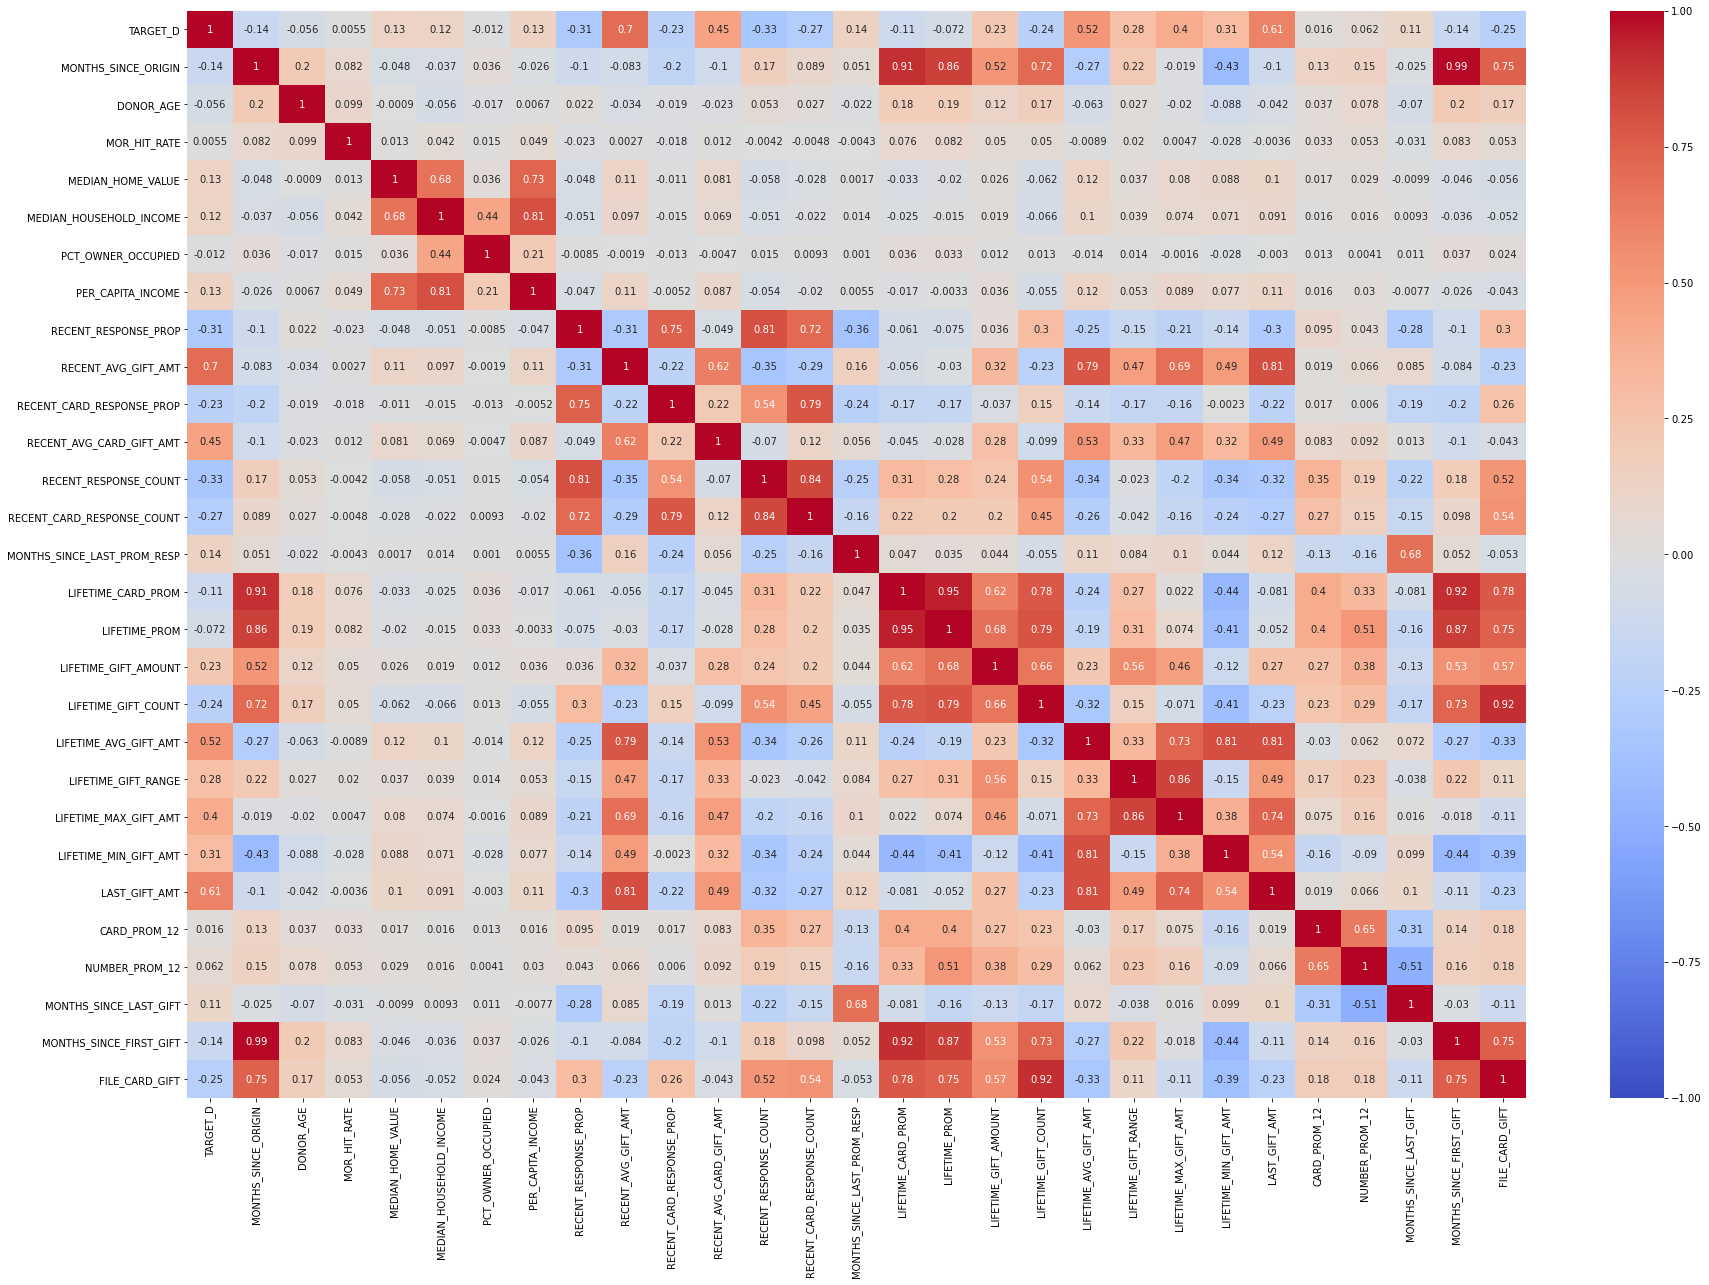

In [510]:
plt.figure(figsize=(30,20))
sns.heatmap(donors.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

After a first look at the correlation matrix, we can see that there are few numerical variables with a high correlation with the variable TARGET_D, the basis for DONATION_TYPE, which is one of the target variables:
+ `RECENT_AVG_GIFT_AMT` seems to be the most correlated feature, with 0.7. 
+ `LAST_GIFT_AMT` and `LIFETIME_AVG_GIFT_AMT` also show high correlation (0.61 and 0.52).

Looking at the correlation matrix can help us identify redundant variables and reduce the number of features in the dataset:

+ `MONTHS_SINCE_FIRST_GIFT` and `MONTHS_SINCE_ORIGIN` display the highest correlation in the matrix. These features are essentially the same and provide the same information, that is, the number of months since the donor first donated. We can safely remove one of them.

In [511]:
donors1 = donors.drop("MONTHS_SINCE_ORIGIN", axis=1)

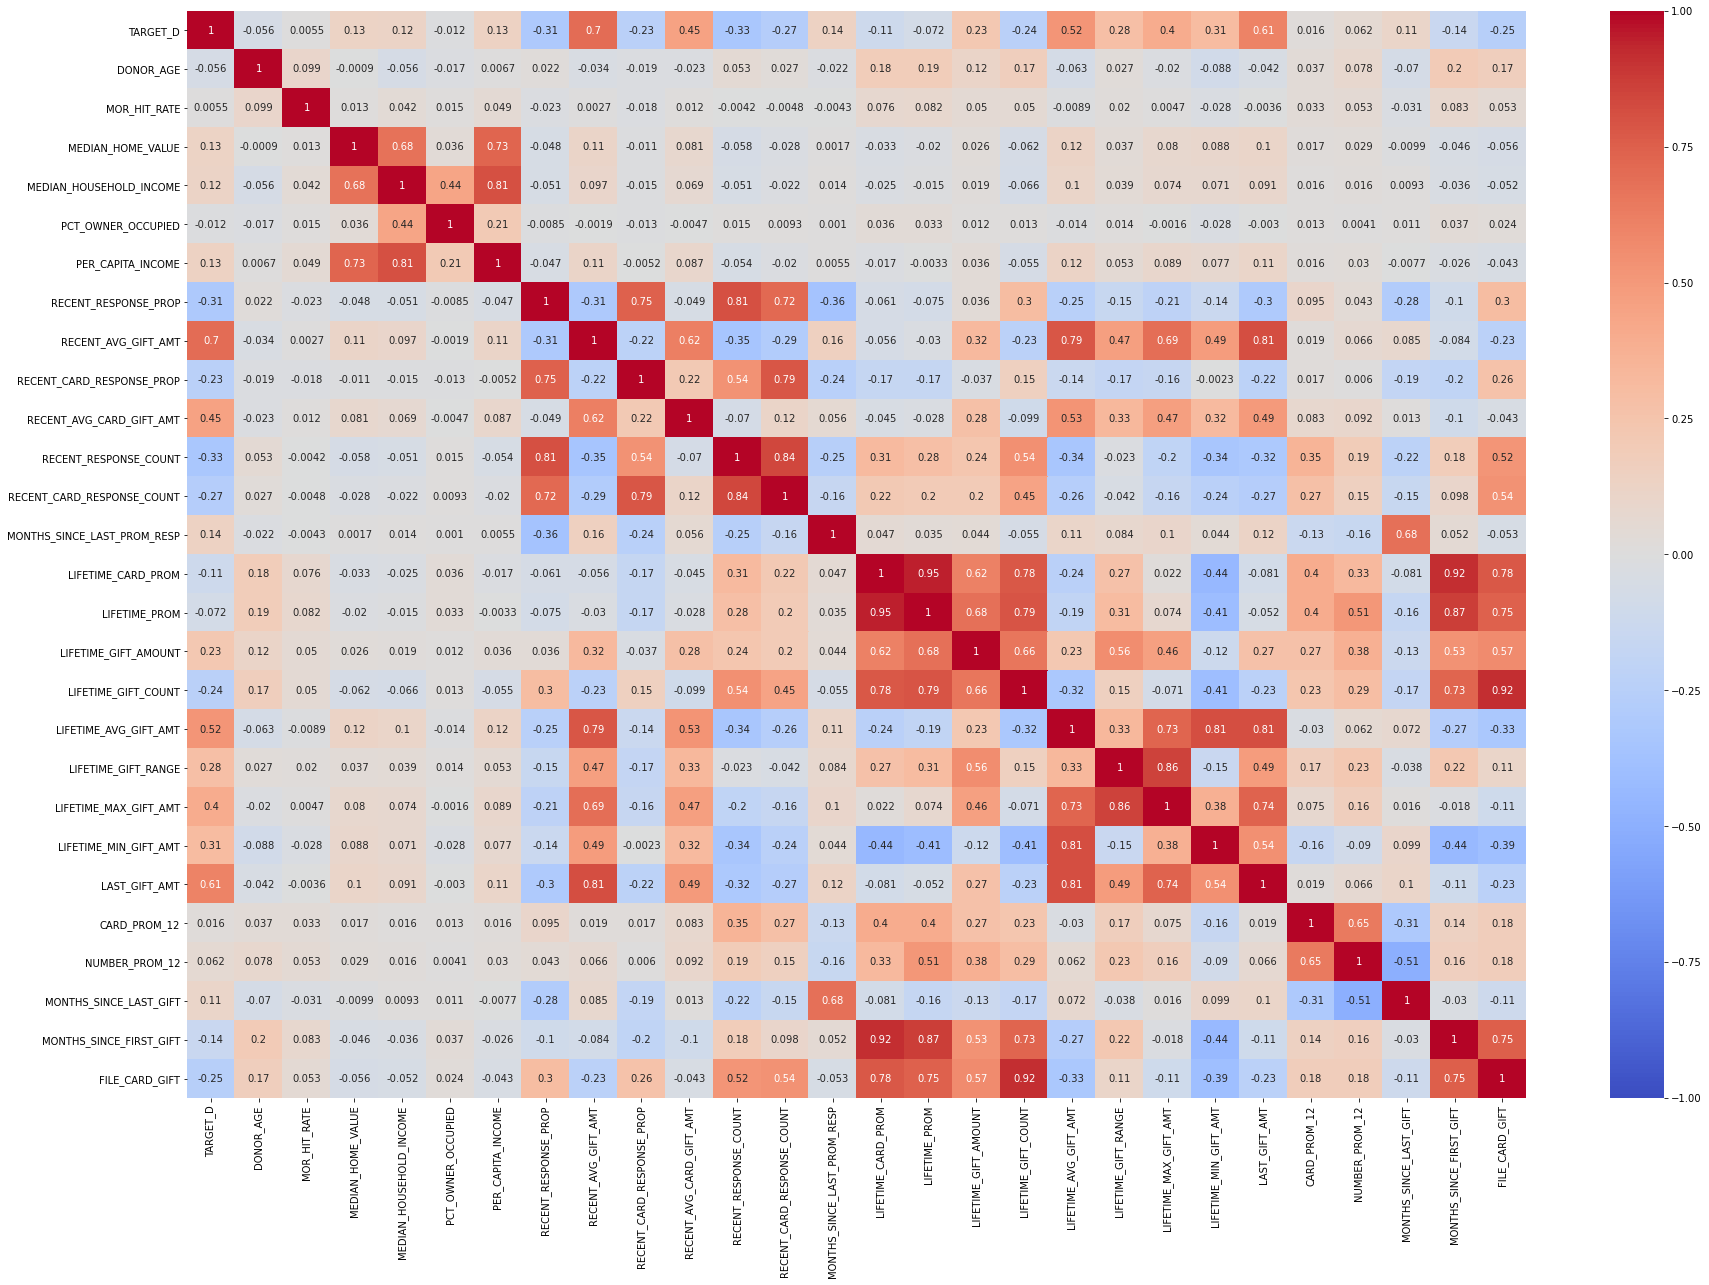

In [512]:
plt.figure(figsize=(30,20))
sns.heatmap(donors1.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

+ The next highly correlated features are `LIFETIME_CARD_PROM` and `LIFETIME_PROM`. These two features show the number of card promotions and the total number of promotions sent to the donor. It is worth it to see if these values differ  much between them.

In [513]:
donors1['LIFETIME_PROM'].head()

0     90
1    119
2     96
3     83
4     59
Name: LIFETIME_PROM, dtype: int64

In [514]:
donors1['LIFETIME_CARD_PROM'].head()

0    32
1    44
2    31
3    30
4    22
Name: LIFETIME_CARD_PROM, dtype: int64

In [515]:
allProms = donors1['LIFETIME_PROM'].values
cardProms = donors1['LIFETIME_CARD_PROM'].values

equal=0
for i in range(len(allProms)):
    if allProms[i]==cardProms[i]:
        equal+=1

propEqual=int((equal/len(allProms))*100)
propEqual

0

The values for these two features are vastly different for the same donor. However, since our target variables related to the donor's response to a mail (card) solicitation, the number of times a person responded to a card promotion is more relevant to the problem at hand. So, we should keep `LIFETIME_CARD_PROM` over the more general `LIFETIME_PROM`.

In [516]:
donors2 = donors1.drop(['LIFETIME_PROM'], axis=1)

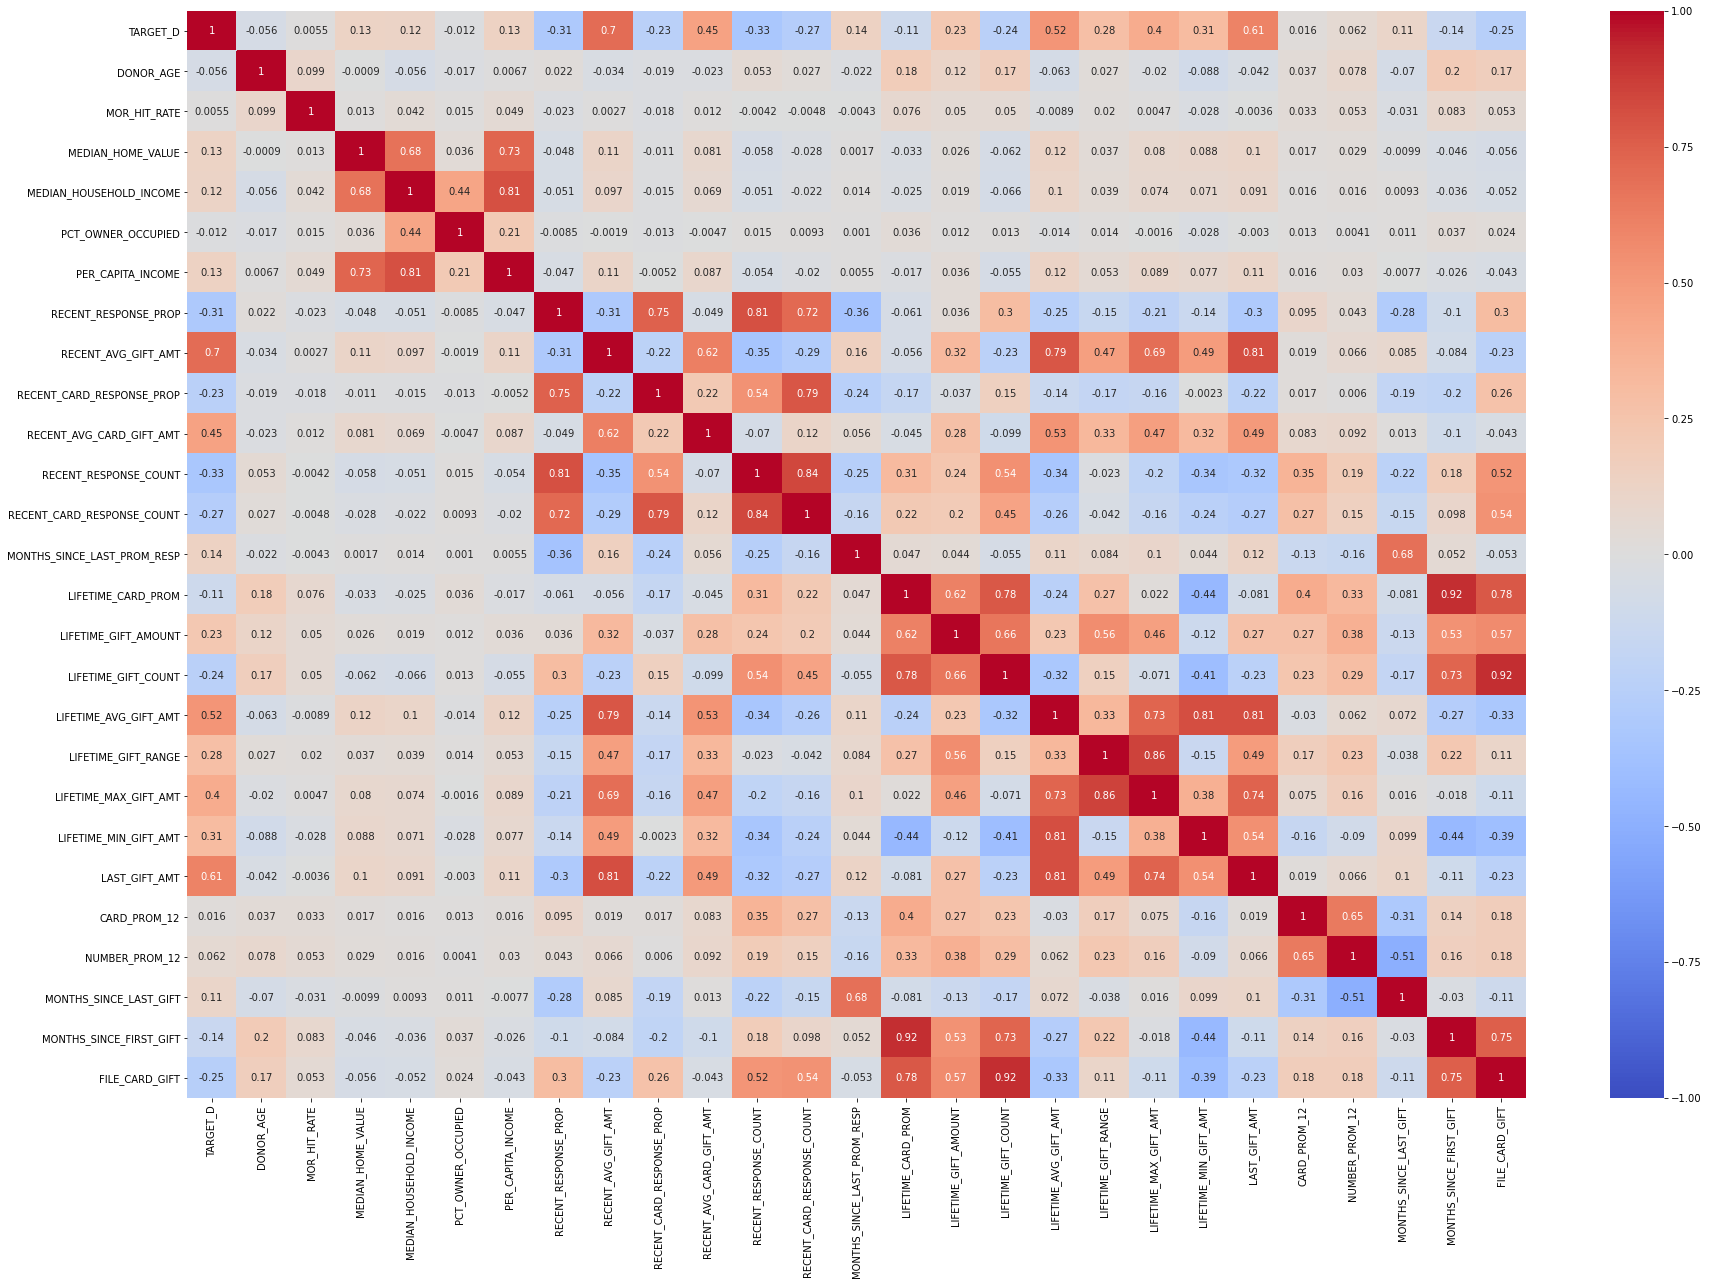

In [517]:
plt.figure(figsize=(30,20))
sns.heatmap(donors2.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

+ Next we look at `LIFETIME_MIN_GIFT_AMT` and `LIFETIME_MAX_GIFT_AMT`. These features are redundant because there is another, `LIFETIME_GIFT_RANGE`, that provides essentially the same information. We will keep this last feature and drop the other two.

**To remove:** LIFETIME_MIN_GIFT_AMT, LIFETIME_MAX_GIFT_AMT

In [518]:
donors3 = donors2.drop(['LIFETIME_MIN_GIFT_AMT', 'LIFETIME_MAX_GIFT_AMT'], axis=1)

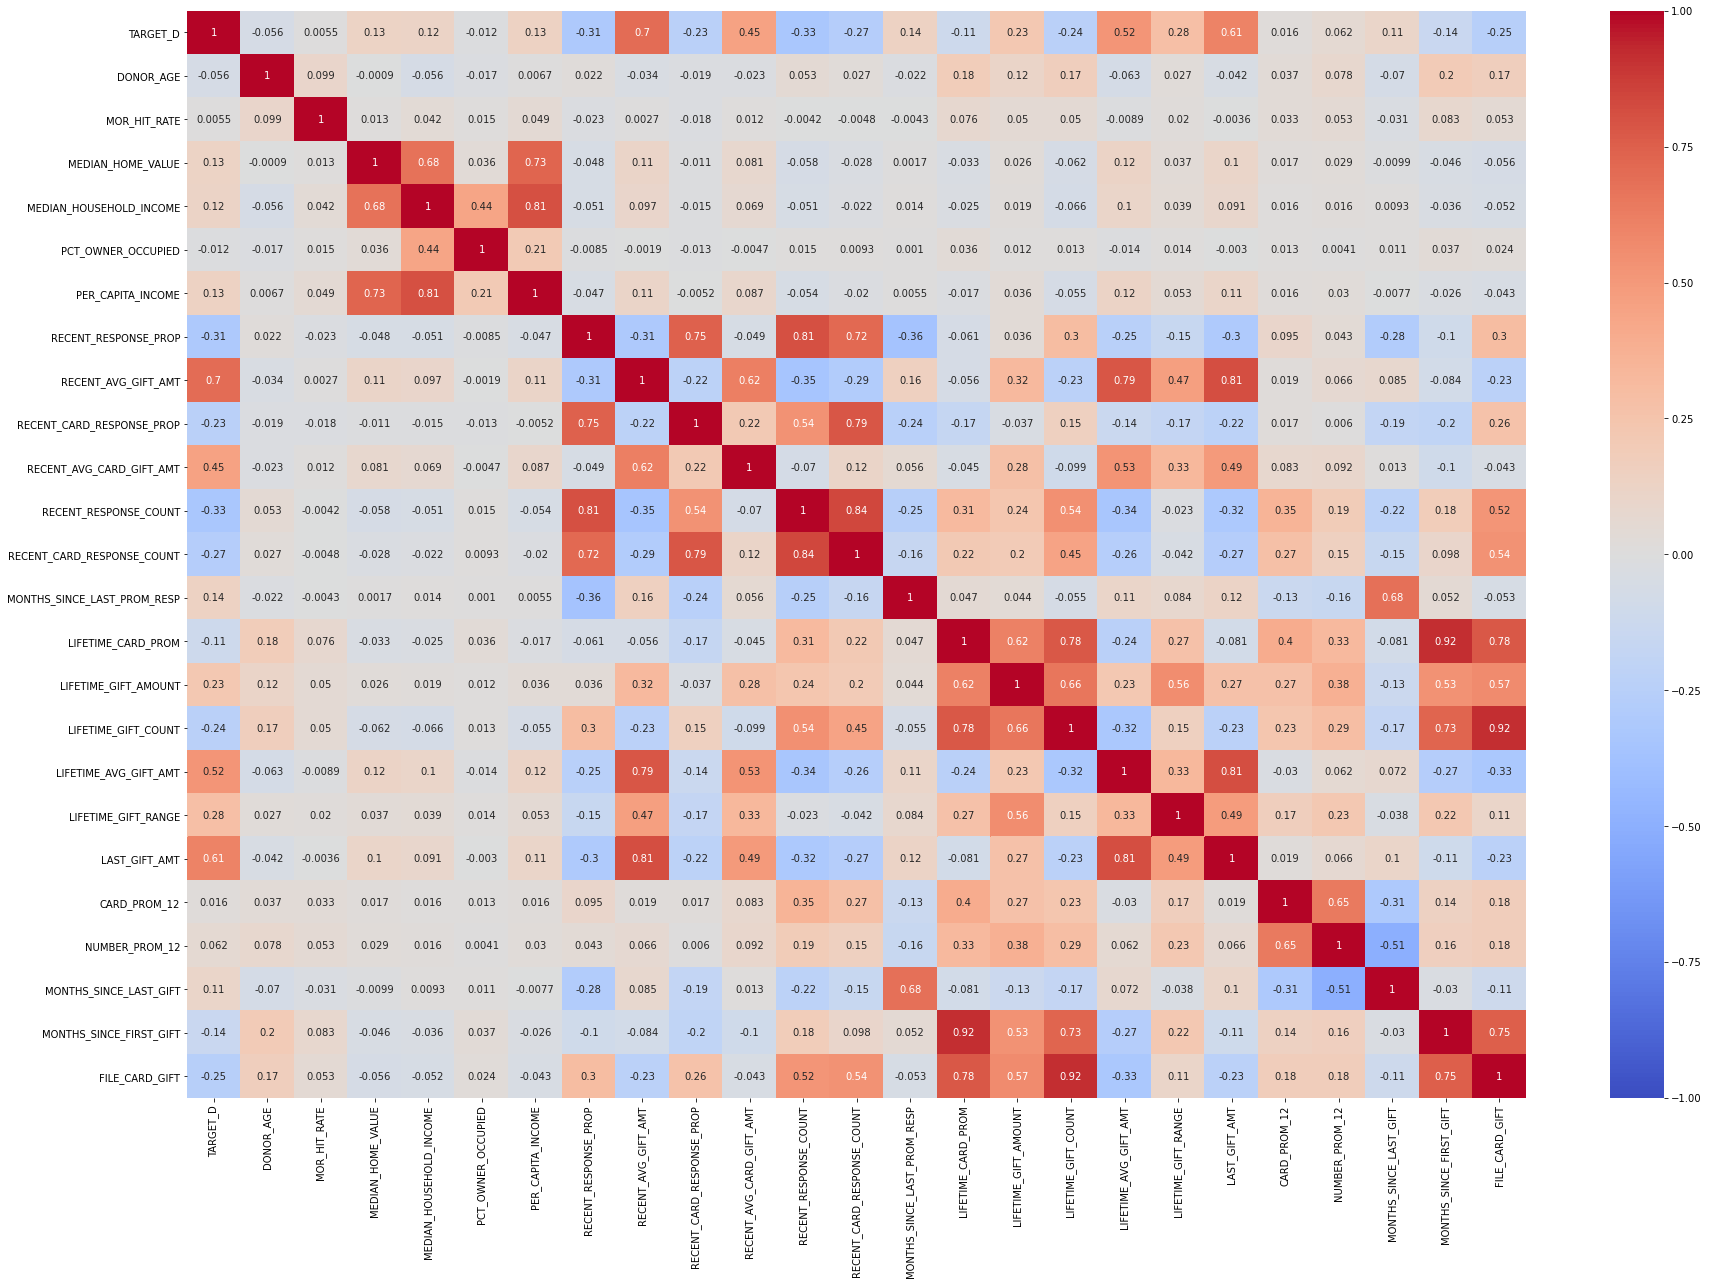

In [519]:
plt.figure(figsize=(30,20))
sns.heatmap(donors3.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

+ Next we have the issue of `RECENT_CARD_RESPONSE_COUNT` and `RECENT_CARD_RESPONSE_PROP`: they are basically the same feature, only one accounts for the number of total promotions sent and the other the proportion of successful replies. The feature for the proportion seems to be more indicative of a frequent donor than the first one, so we will keep `RECENT_CARD_RESPONSE_COUNT`.
+ For `RECENT_RESPONSE_COUNT` and `RECENT_RESPONSE_PROP` the issue is the same. We will do the same as before and keep `RECENT_RESPONSE_PROP` over `RECENT_RESPONSE_COUNT`.
+ Keeping this two features, we still have a problem that is similar to what we had before: they are highly correlated (0.81) and `RECENT_CARD_RESPONSE_PROP` is more specific to the problem we have than `RECENT_RESPONSE_PROP`. So, like we did before, we will keep only `RECENT_CARD_RESPONSE_PROP` in the dataset.

**To remove:** RECENT_CARD_RESPONSE_COUNT, RECENT_RESPONSE_COUNT, RECENT_RESPONSE_PROP. 

In [520]:
donors4 = donors3.drop(['RECENT_CARD_RESPONSE_COUNT', 'RECENT_RESPONSE_COUNT', 'RECENT_RESPONSE_PROP'], axis=1)

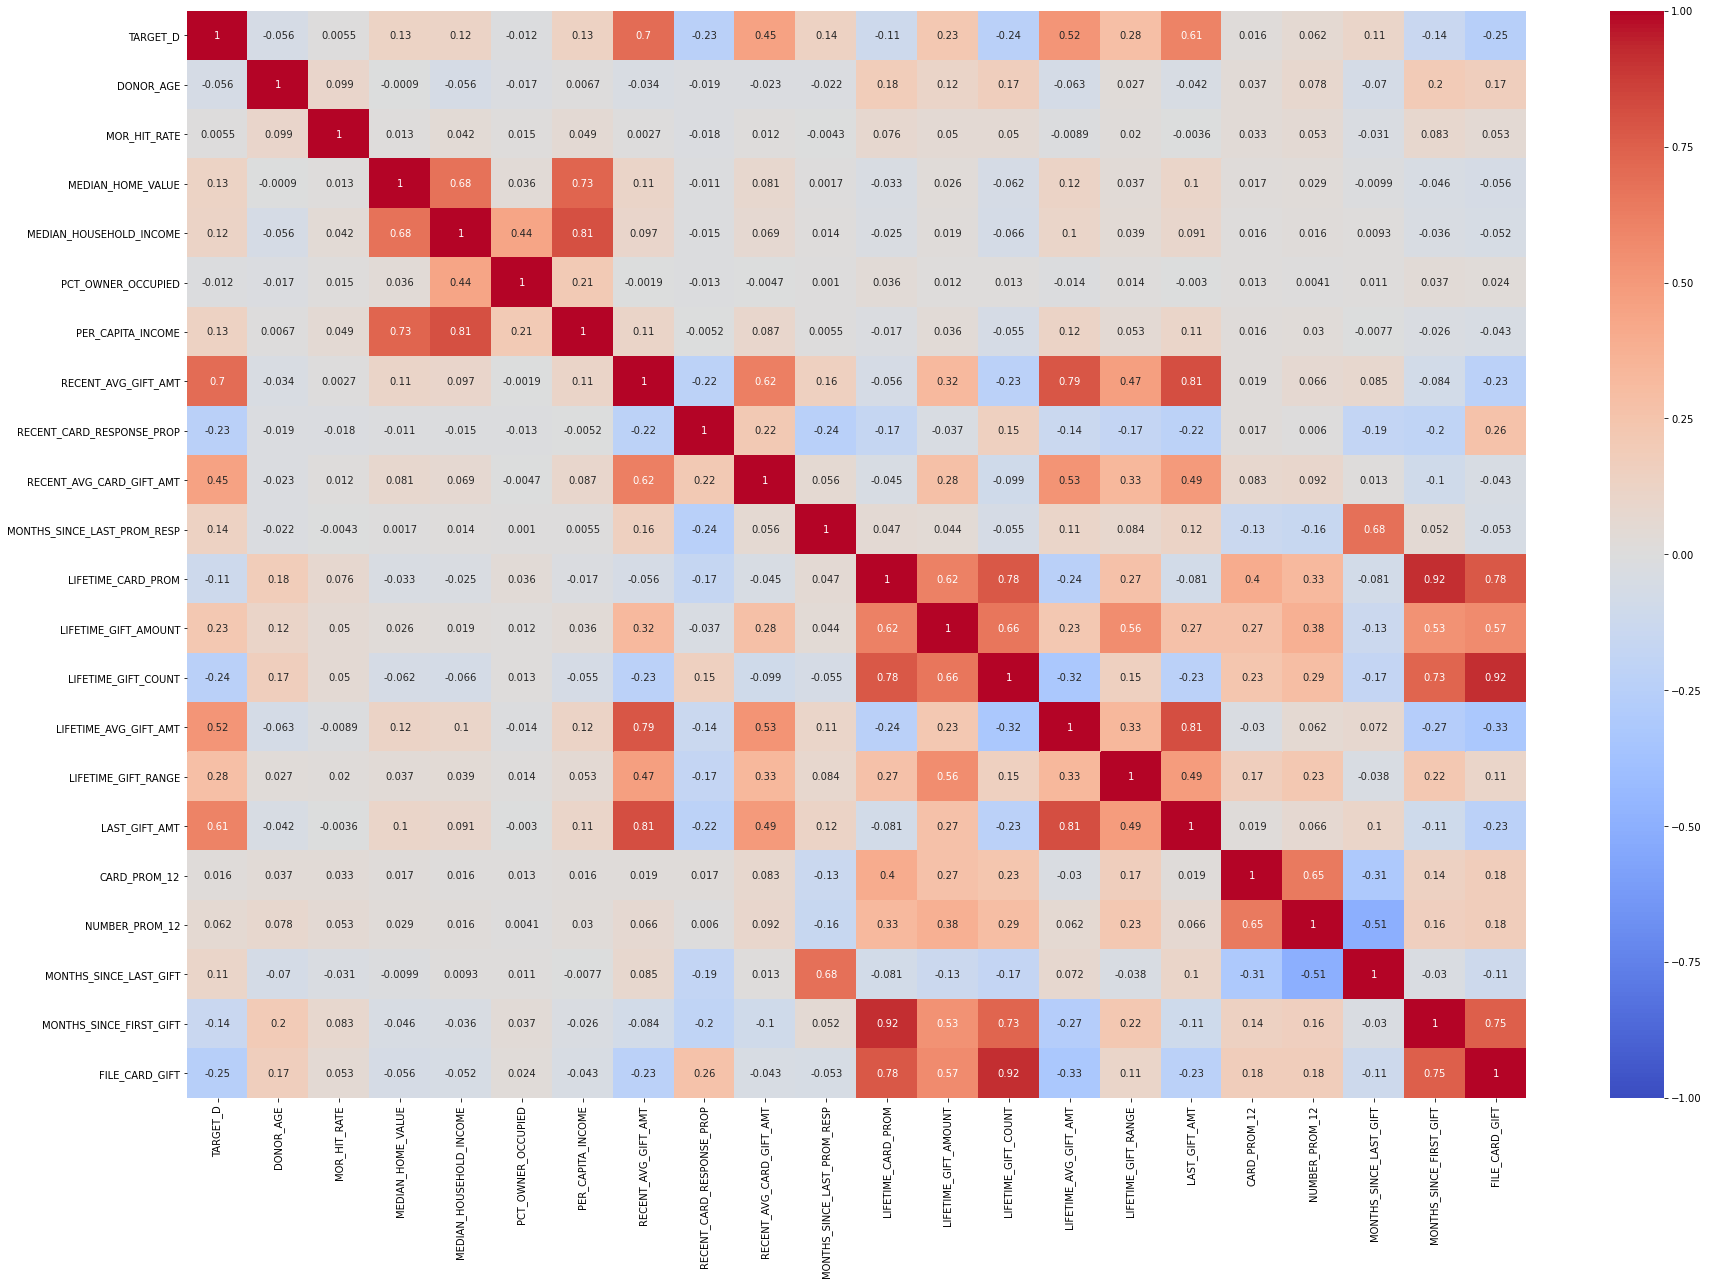

In [521]:
plt.figure(figsize=(30,20))
sns.heatmap(donors4.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

Similarly to what we did before, we will drop `NUMBER_PROM_12` in favor of `CARD_PROM_12`.

In [522]:
donors5 = donors4.drop(['NUMBER_PROM_12'], axis=1)

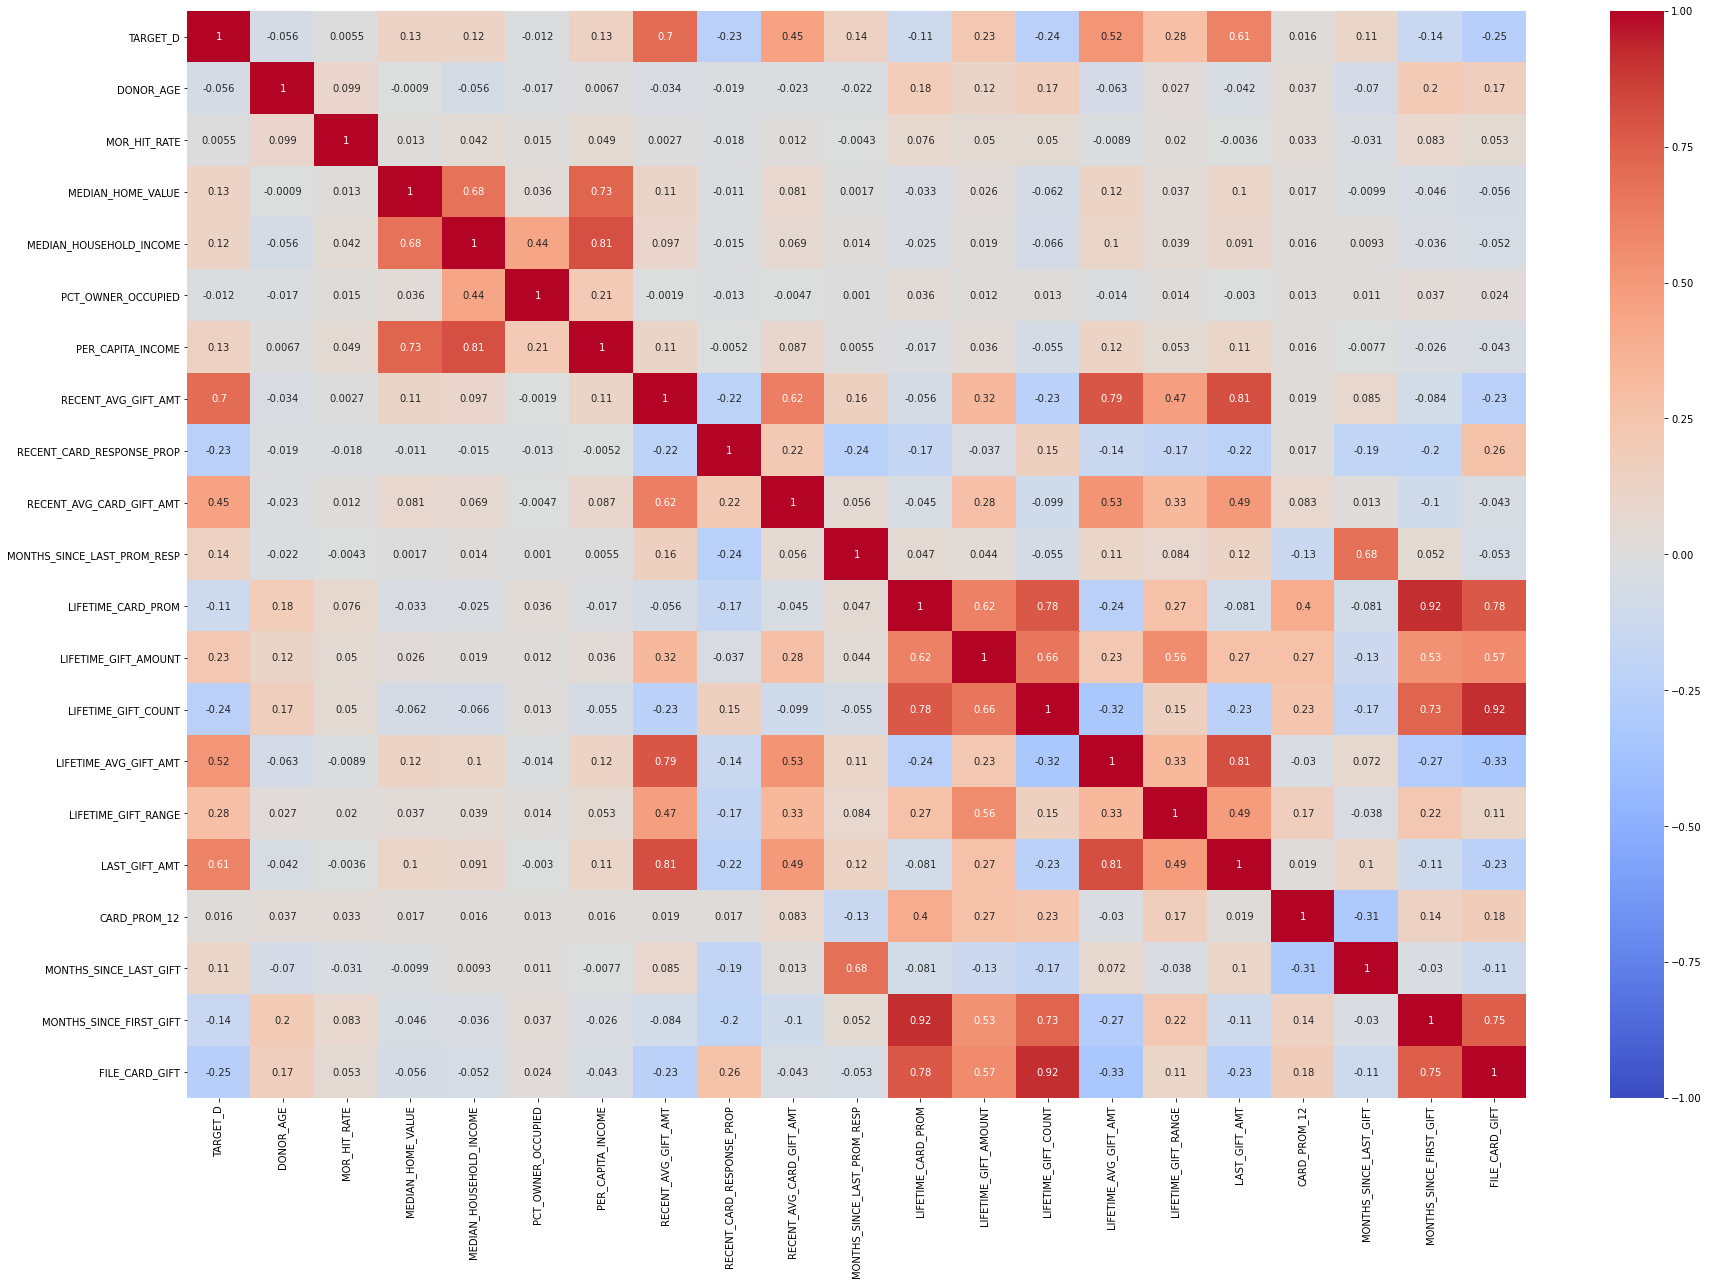

In [523]:
plt.figure(figsize=(30,20))
sns.heatmap(donors5.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

The remaining highly correlated features have information that can not be considered redundant. For instance, `MONTHS_SINCE_FIRST_GIFT` and `LIFETIME_CARD_PROM` have a correlation of 0,92. However, it is obvious that the longer someone has donated the higher the number of card promotions that were sent to that person. These features, despite being related, offer two different types of information and, as such, will be kept in the dataset. 

In [524]:
originalDF = donors
donors = donors5

In [525]:
donors.shape

(18918, 35)

In [526]:
numVars = []
for col in donors.columns:
    if donors[col].dtype.name != "category":
        numVars.append(col)
        
len(numVars)

21

In [527]:
catVars = []
for col in donors.columns:
    if donors[col].dtype.name == "category":
        catVars.append(col)
        
len(catVars)

14

We ended up with a dataframe of 18918 rows and 35 columns. As we still have `TARGET_D` in the dataframe, this means we currently have 32 features (of which 21 numerical and 11 categorical) and 2 target variables: `TARGET_B` and `DONATION_TYPE` (both categorical).

### Exploratory Data Analysis

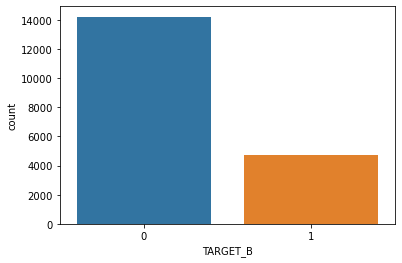

In [528]:
sns.countplot(x=donors['TARGET_B'])
plt.show()

There are a lot more 0's in TARGET_B then 1's. This might cause some problems because the groups are too unbalanced.

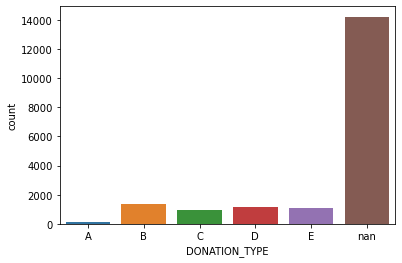

In [529]:
sns.countplot(x=donors["DONATION_TYPE"])
plt.show()

The amount of NA's in `DONATION_TYPE` is making it difficult to visualize this plot. We can create a subset of the donors dataset with only the non-null values of `DONATION_TYPE`.

In [530]:
activeIndex = []
for i in donors.index:
    if np.isnan(donors["TARGET_D"][i]) == False:
        activeIndex.append(i)
        
len(activeIndex)

4703

In [531]:
activeDonors = donors.loc[activeIndex]

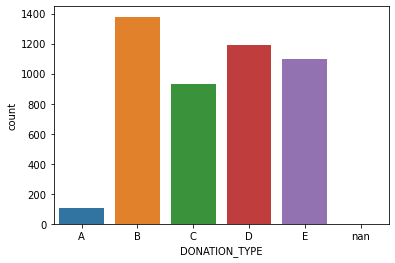

In [532]:
sns.countplot(x=activeDonors["DONATION_TYPE"])
plt.show()

Looking only at people who actually donated, we can see that the groups are now more balanced, even though group "A" - the biggest donors - are at a clear minority. We should process these data so the groups are more balanced.

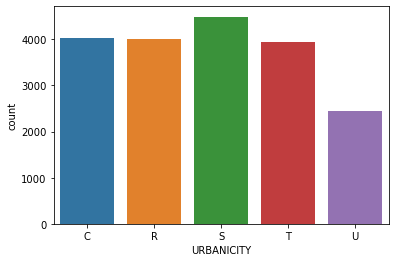

In [533]:
sns.countplot(x=donors['URBANICITY'])
plt.show()

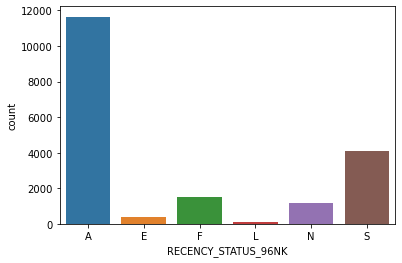

In [534]:
sns.countplot(x=donors['RECENCY_STATUS_96NK'])
plt.show()

The groups are too unbalanced, with active ("A") donors being more than half of all donors. Active and star ("S") donors make about 80% of all donors. 

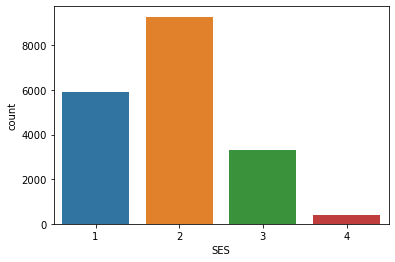

In [535]:
sns.countplot(x=donors['SES'])
plt.show()

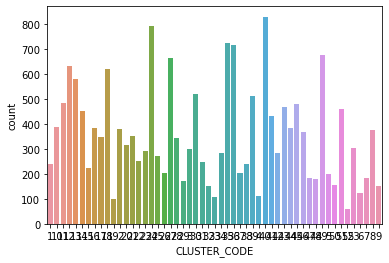

In [536]:
sns.countplot(x=donors['CLUSTER_CODE'])
plt.show()

There are 54(!) values for this variable. From the dataset description we see that `CLUSTER_CODE` reflects socioeconomic status, urbanicity, ethnicity, and other demographic characteristics. We already have all of this information in other features with a lot less categories (`URBANICITY`, `SES`) so this can be considered redundant data. Also, if we want to convert categorical variables by One-Hot Encoding, this would create 53 new features and introduce too much noise to the model.

In [537]:
donors = donors.drop("CLUSTER_CODE", axis=1)

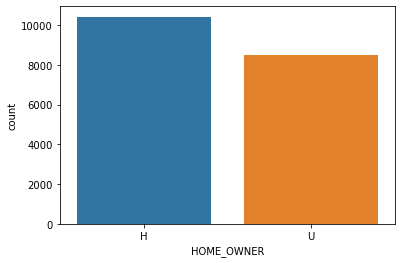

In [538]:
sns.countplot(x=donors['HOME_OWNER'])
plt.show()

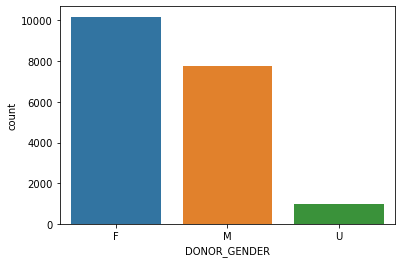

In [539]:
sns.countplot(x=donors['DONOR_GENDER'])
plt.show()

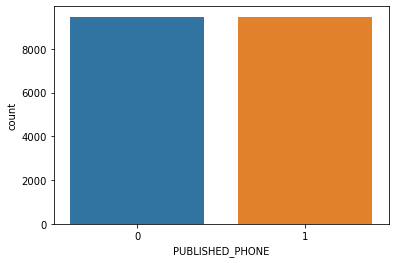

In [540]:
sns.countplot(x=donors['PUBLISHED_PHONE'])
plt.show()

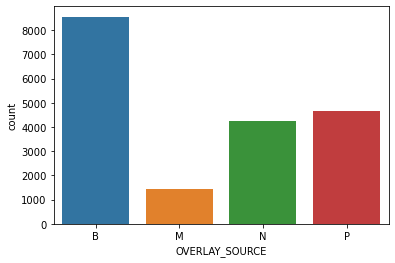

In [541]:
sns.countplot(x=donors['OVERLAY_SOURCE'])
plt.show()

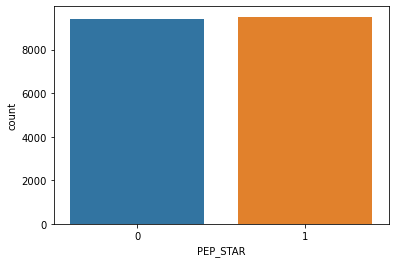

In [542]:
sns.countplot(x=donors['PEP_STAR'])
plt.show()

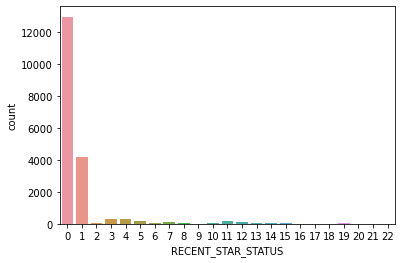

In [543]:
sns.countplot(x=donors['RECENT_STAR_STATUS'])
plt.show()

There's a problem with this feature: from the dataset description we can see that `RECENT_STAR_STATUS` is supposed to be a binary variable. However, there are a lot of non 0 or 1 values. We can't really tell what these values are supposed to mean (number of months since star status, maybe?). We need to process this feature so that all the non-zero values are 1.

In [544]:
donors["RECENT_STAR_STATUS"].unique()

[1, 0, 4, 19, 10, ..., 15, 21, 20, 18, 22]
Length: 23
Categories (23, int64): [1, 0, 4, 19, ..., 21, 20, 18, 22]

In [545]:
donors["RECENT_STAR_STATUS"] = np.where((donors["RECENT_STAR_STATUS"] != 0), "1", donors["RECENT_STAR_STATUS"])
donors["RECENT_STAR_STATUS"] = pd.Categorical(donors["RECENT_STAR_STATUS"])
donors["RECENT_STAR_STATUS"].unique()

['1', '0']
Categories (2, object): ['1', '0']

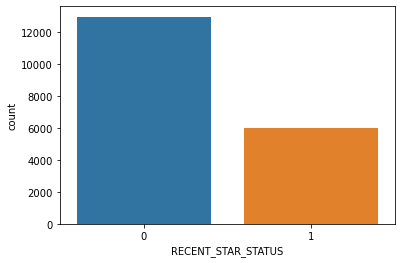

In [546]:
sns.countplot(x=donors['RECENT_STAR_STATUS'])
plt.show()

### Variable effect on TARGET_B and DONATION_TYPE

#### DONOR_AGE

<AxesSubplot:xlabel='TARGET_B', ylabel='DONOR_AGE'>

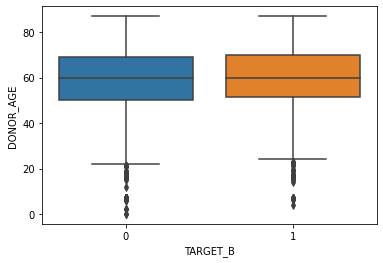

In [547]:
sns.boxplot(x='TARGET_B', y='DONOR_AGE', data=donors)

It seems that the age of a donor does not vary that much between the two groups, with active donors being only a little older than non-donors.

In [548]:
donors["DONOR_AGE"].describe()

count    18918.000000
mean        59.164552
std         14.474749
min          0.000000
25%         51.000000
50%         60.000000
75%         69.000000
max         87.000000
Name: DONOR_AGE, dtype: float64

There are values of age = 0. This can be a mistake or a donation in the name of a newborn(?).

In [549]:
donors["DONOR_AGE"].sort_values().head(10)

13421    0
8740     0
8765     2
14492    2
9774     2
17708    4
739      6
8615     6
3559     6
10164    6
Name: DONOR_AGE, dtype: int32

There are only two values for age = 0. This probably means that they do not represent a mistake and should still be considered.

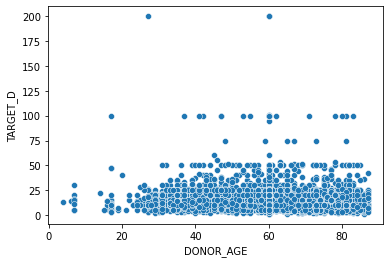

In [550]:
sns.scatterplot(x='DONOR_AGE', y='TARGET_D', data=activeDonors)
plt.show()

There doesn't seem to be any type of relation between age and donation amount.

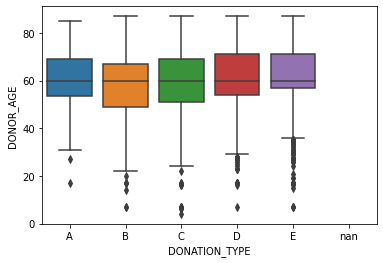

In [551]:
sns.boxplot(x='DONATION_TYPE', y='DONOR_AGE', data=activeDonors)
plt.show()

Groups **A** and **C** look very similar, with **C** displaying higher variation. Group **B** is the youngest group. Groups **D** and **E**, the donors who give smaller amounts, seem to be the groups with higher age. All the groups show similar median age.

In [552]:
activeDonors = donors.loc[activeIndex]
activeDonors

,TARGET_B,TARGET_D,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE
0,1,10.0,79,0,R,2,H,M,0,P,0,334,212,72,10385,1,1,S,2,15.00,0.250,15.00,11,32,368.0,25,14.72,20.0,17.0,7,7,122,12,D
6,1,5.0,79,0,C,2,H,F,0,P,0,1004,189,95,12667,1,0,A,4,5.00,0.444,5.00,12,33,101.0,20,5.05,4.0,5.0,9,9,91,8,E
8,1,16.0,63,0,R,2,H,F,1,B,0,399,307,86,11428,1,1,S,3,8.60,0.571,8.50,11,27,150.0,22,6.82,8.0,8.0,11,9,91,13,C
13,1,3.0,60,0,R,2,U,F,1,N,0,475,227,70,10221,1,1,S,2,10.00,0.500,10.00,22,44,186.0,31,6.00,9.0,10.0,9,22,129,14,E
14,1,12.0,81,0,R,2,U,M,1,B,24,530,236,81,12208,1,0,A,4,9.64,0.455,9.80,11,33,270.0,29,9.31,10.0,15.0,11,6,89,7,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18892,1,47.0,17,1,U,1,U,M,1,M,16,5667,492,18,51280,0,0,A,1,32.00,0.000,0.00,26,16,173.0,6,28.83,24.0,32.0,5,26,44,2,B
18893,1,3.0,77,1,C,3,H,F,1,B,0,297,130,51,8510,0,0,A,4,4.25,0.667,5.00,15,14,52.0,11,4.73,8.0,6.0,3,15,104,8,E
18899,1,5.0,60,0,T,3,U,F,1,M,0,431,222,55,8886,1,1,S,4,5.45,0.400,6.25,15,21,104.5,18,5.81,4.5,5.0,5,15,51,8,E
18900,1,15.0,55,0,T,2,H,F,1,B,0,571,300,79,10689,0,0,F,1,15.00,0.000,0.00,20,4,15.0,1,15.00,0.0,15.0,3,20,20,0,C


#### Urbanicity

<AxesSubplot:xlabel='URBANICITY', ylabel='count'>

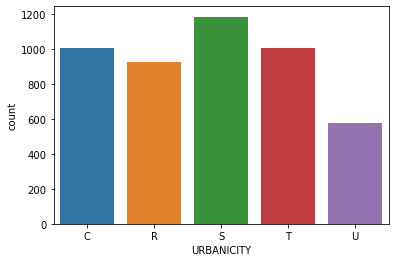

In [553]:
sns.countplot(x='URBANICITY', data=activeDonors)

**Suburban** group is the highest among donors. **Urban** donors are the minority.

In [554]:
# Calculating mean donation amount by Urbanicity group
activeDonors["TARGET_D"].groupby(activeDonors["URBANICITY"]).mean().sort_values(ascending=False)

URBANICITY
U    16.673744
S    16.636689
T    15.082008
C    15.028330
R    14.184455
Name: TARGET_D, dtype: float64

Despite being the minority, **urban** donors seem to donate the highest mean amounts between every group. **Rural** donors donate the lowest amounts.

In [555]:
urban_table = pd.crosstab(index=activeDonors["URBANICITY"], columns=activeDonors["DONATION_TYPE"])
urban_table

DONATION_TYPE,A,B,C,D,E
URBANICITY,,,,,
C,19,264,194,285,244
R,17,233,168,249,260
S,29,405,264,279,210
T,22,287,194,244,259
U,16,190,111,136,124


<AxesSubplot:xlabel='URBANICITY'>

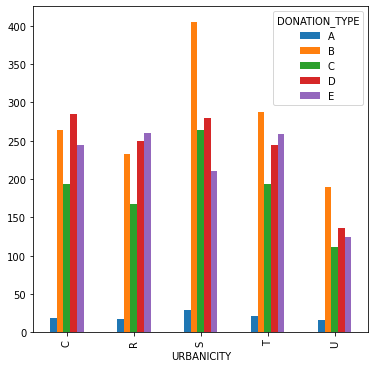

In [556]:
urban_table.plot(kind="bar", figsize=(6,6))

In terms of proportions, all the `URBANICITY` categories seem to follow the same general pattern: type **B** or **D** are the most frequent types, then **E**, **C** and **A**, following the order we saw before.

#### Gender

keep unknown (?)

<AxesSubplot:xlabel='DONOR_GENDER', ylabel='count'>

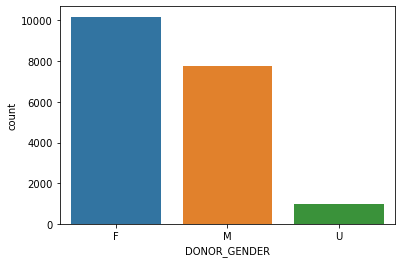

In [557]:
sns.countplot(x='DONOR_GENDER', data=donors)

<AxesSubplot:xlabel='DONOR_GENDER', ylabel='count'>

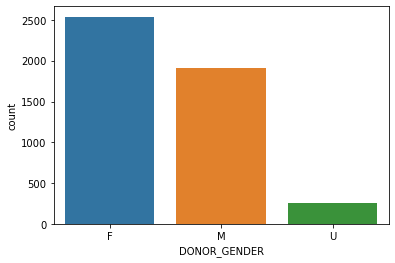

In [558]:
sns.countplot(x='DONOR_GENDER', data=activeDonors)

The gender proportions are the same when it comes to all donors and  active donors - **women are the majority in both groups**.

In [559]:
# Calculating mean donation amount by Gender
activeDonors["TARGET_D"].groupby(activeDonors["DONOR_GENDER"]).mean().sort_values(ascending=False)

DONOR_GENDER
U    15.956522
M    15.950612
F    15.080347
Name: TARGET_D, dtype: float64

Unknown donors are the highest givers, followed very closely by male donors. There is a mean gap of $1 between donation amounts made by unknown and male donors and female donors.

#### IN-HOUSE, PUBLISHED_PHONE, OVERLAY_SOURCE, PEP_STAR

In [560]:
def plot_categorical(var, data=donors):
    """
    Creates a count plot, a bar plot for DONATION_TYPE, the mean for TARGET_D and a boxplot for TARGET_D for a 
    categorical variable of the donors dataset. Can be used for the activeDonors and nonDonors data tables as well.
    Requires: var is a string, the name of a column of the donors dataset.
    """
    # countplot
    sns.countplot(x=var, data = data)
    plt.show()
    
    # barplot
    cross_table = pd.crosstab(index=data[var], columns=data["DONATION_TYPE"])
    cross_table.plot(kind="bar", figsize=(6,6))
    plt.show()
    
    # boxplot
    sns.boxplot(x=var, y='TARGET_D', data=data)
    plt.show()
    
    # mean
    mean = data["TARGET_D"].groupby(data[var]).mean().sort_values(ascending=False)
    print(mean)

<AxesSubplot:xlabel='IN_HOUSE', ylabel='count'>

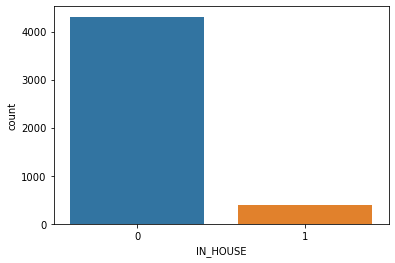

In [561]:
sns.countplot(x="IN_HOUSE", data = activeDonors)

Only a small number of donors had donated to the in-house program. Might not be a good predictor for donations.

In [562]:
house_table = pd.crosstab(index=activeDonors["IN_HOUSE"], columns=activeDonors["DONATION_TYPE"])
house_table

DONATION_TYPE,A,B,C,D,E
IN_HOUSE,,,,,
0,89,1276,853,1068,1022
1,14,103,78,125,75


<AxesSubplot:xlabel='IN_HOUSE'>

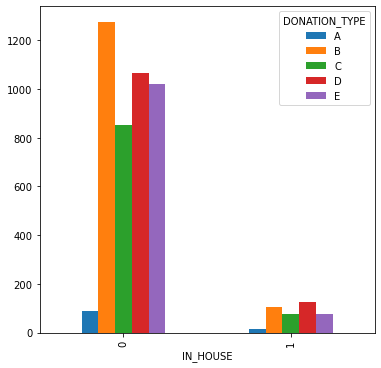

In [563]:
house_table.plot(kind="bar", figsize=(6,6))

In [564]:
# Calculating mean donation amount by In_House
activeDonors["TARGET_D"].groupby(activeDonors["IN_HOUSE"]).mean().sort_values(ascending=False)

IN_HOUSE
1    16.665063
0    15.372746
Name: TARGET_D, dtype: float64

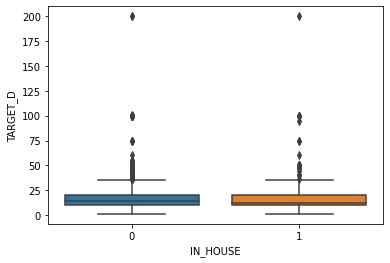

In [565]:
sns.boxplot(x='IN_HOUSE', y='TARGET_D', data=donors)
plt.show()

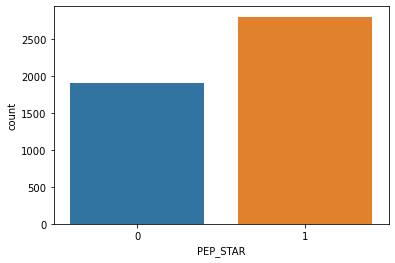

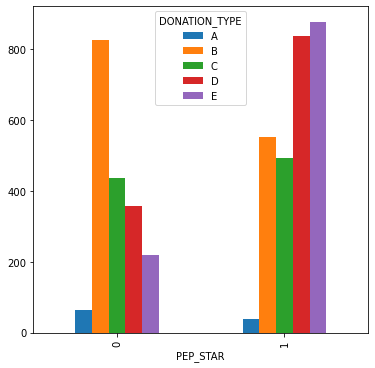

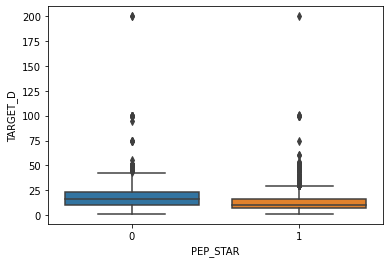

PEP_STAR
0    18.808304
1    13.216108
Name: TARGET_D, dtype: float64


In [566]:
plot_categorical("PEP_STAR", activeDonors)

It's a bit surprising that Star donors give, in general, lower amounts of money than non-star donors. It could be that donors, after getting star status, stop giving as much money as they used to - non-Star donors give higher amounts of money than Star donors. It could be worth looking at `RECENT_STAR_STATUS` to acess this hypothesis.

<AxesSubplot:xlabel='RECENT_STAR_STATUS', ylabel='TARGET_D'>

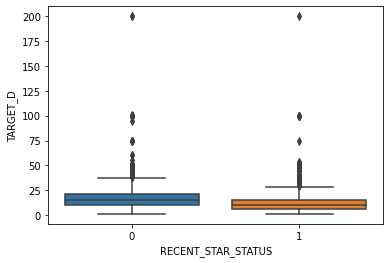

In [567]:
sns.boxplot(x=activeDonors["RECENT_STAR_STATUS"], y=activeDonors["TARGET_D"])

Looks like donors who got Star status in the last 4 years donate less than the other donors. As we have seen before, non-star donors give higher amounts of money so this confirms the theory that, after getting star status, donors stop giving as much money as they did.

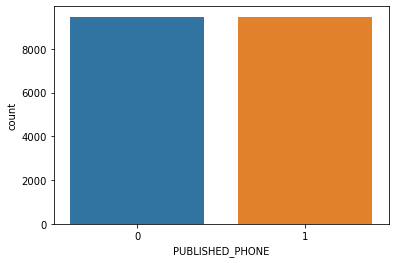

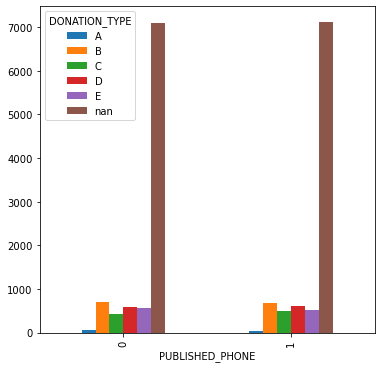

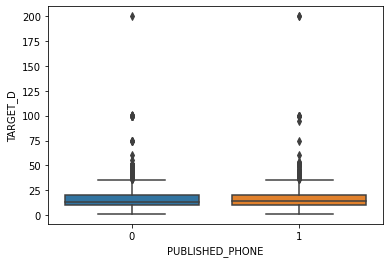

PUBLISHED_PHONE
0    15.658559
1    15.302727
Name: TARGET_D, dtype: float64


In [568]:
plot_categorical("PUBLISHED_PHONE")

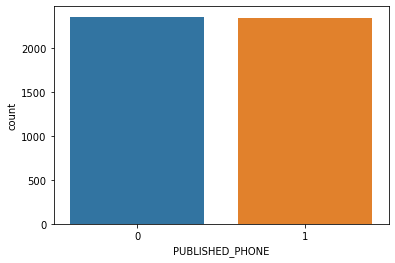

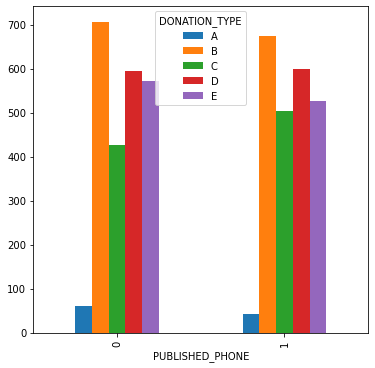

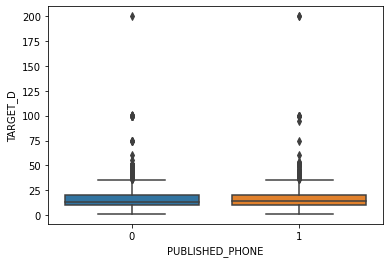

PUBLISHED_PHONE
0    15.658559
1    15.302727
Name: TARGET_D, dtype: float64


In [569]:
plot_categorical("PUBLISHED_PHONE", activeDonors)

There doesn't seem to be a difference between donors who have their phone published and those who don't. Might not be a good predictor.

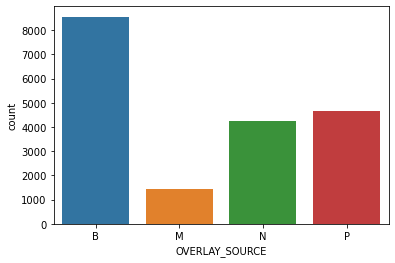

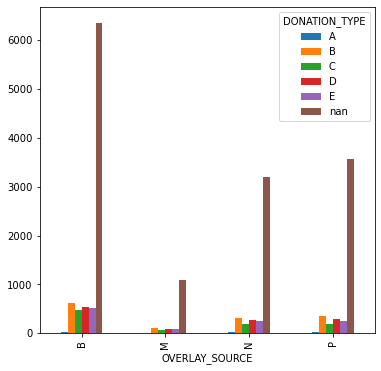

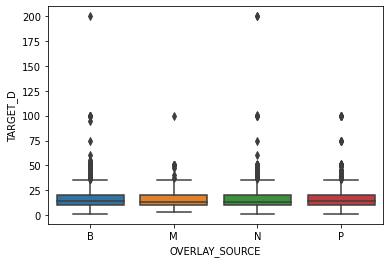

OVERLAY_SOURCE
P    16.073710
N    15.708097
M    15.131285
B    15.129254
Name: TARGET_D, dtype: float64


In [570]:
plot_categorical("OVERLAY_SOURCE")

In [571]:
donors["OVERLAY_SOURCE"].unique()

['P', 'B', 'N', 'M']
Categories (4, object): ['P', 'B', 'N', 'M']

There is a problem with this feature: the feature's description says that there are only 3 possible values - M, P, B. However, there is also a N value which, we assume, means this donor has no source to which it was matched (N = none?).

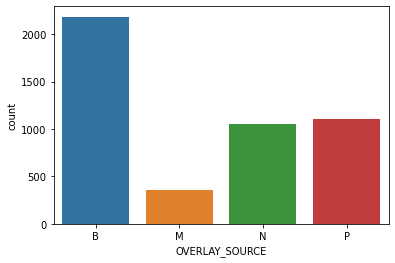

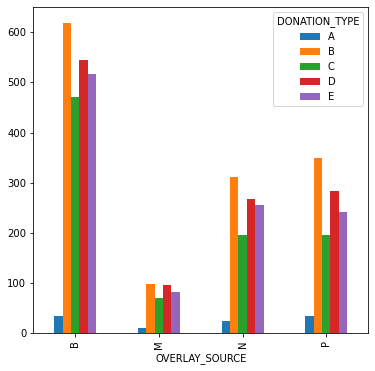

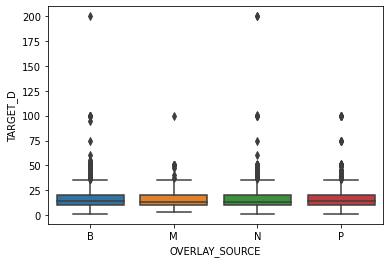

OVERLAY_SOURCE
P    16.073710
N    15.708097
M    15.131285
B    15.129254
Name: TARGET_D, dtype: float64


In [572]:
plot_categorical("OVERLAY_SOURCE", activeDonors)

It seems that donors who were matched against Polk and Metromail are the highest number among all donors. However, the (slightly) highest donors are those who were matched against Polk. It seems that, while being the minority, people who were only matched against Metromail are the most likely to actually donate - about 50% of those donated, while the other sources have a "conversion rate" of about 25%.

#### LIFETIME_AVG_GIFT_AMT

<AxesSubplot:xlabel='TARGET_B', ylabel='LIFETIME_AVG_GIFT_AMT'>

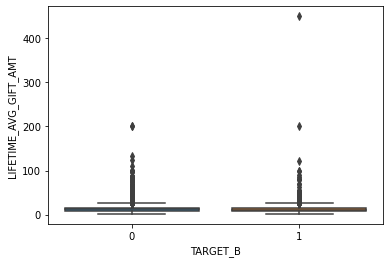

In [573]:
sns.boxplot(x="TARGET_B", y="LIFETIME_AVG_GIFT_AMT", data=donors)

In [574]:
donors["LIFETIME_AVG_GIFT_AMT"].mean()

12.837435775451949

In [575]:
activeDonors["LIFETIME_AVG_GIFT_AMT"].mean()

11.794301509674677

#### SES

We know this is a classification for socio-economic features but we don't yet know the order of the groups. We'll use `PER_CAPITA_INCOME` to evaluate this as it is a similar socio-economic feature.

In [576]:
donors["PER_CAPITA_INCOME"].groupby(donors["SES"]).mean().sort_values(ascending=False)

SES
1    23125.743417
2    13466.332184
3    10378.069515
4     9146.356589
Name: PER_CAPITA_INCOME, dtype: float64

It seems SES group 1 is the highest group and 4 is the lowest, meaning the order is descending, just like it happens in `DONATION_TYPE`.

<AxesSubplot:xlabel='SES', ylabel='count'>

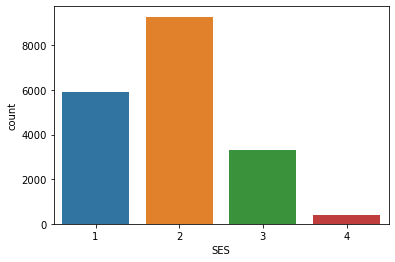

In [577]:
sns.countplot(x="SES", data=donors)

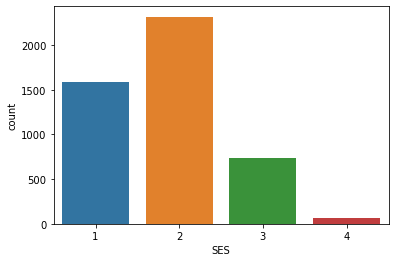

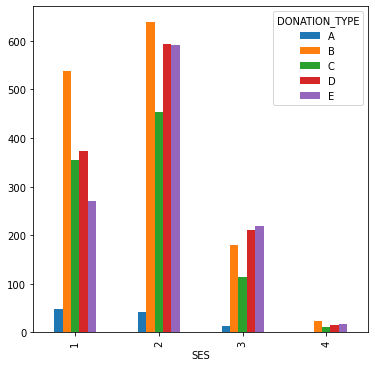

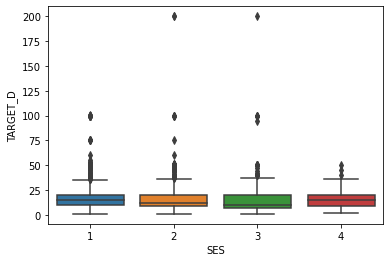

SES
1    17.125597
4    15.565217
2    14.728179
3    14.303888
Name: TARGET_D, dtype: float64


In [578]:
plot_categorical("SES", activeDonors)

SES group 2 is the biggest group, followed by 1, 3 and 4. This happens for both all donors and active donors.

Among active donors, the SES group 1 are the highest donors, by a significant margin. However, group 2 is the majority. Between SES groups, the most frequent donation types are **B**, **D** and **E**. Group 4 donors are a significant minority but are the second best group of donors when it comes to donation amounts, something that is surprising considering this is the lowest group when it comes to `PER_CAPITA_INCOME`.

#### RECENCY_STATUS_96NK

In [579]:
donors["RECENCY_STATUS_96NK"].groupby(donors["RECENCY_STATUS_96NK"]).count()

RECENCY_STATUS_96NK
A    11637
E      410
F     1498
L       89
N     1165
S     4119
Name: RECENCY_STATUS_96NK, dtype: int64

The groups are imbalanced, with class A and S being a clear majority over the rest.

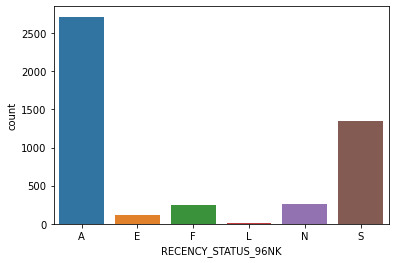

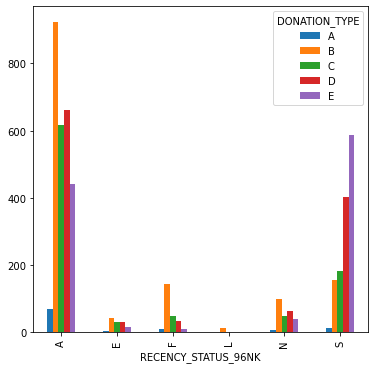

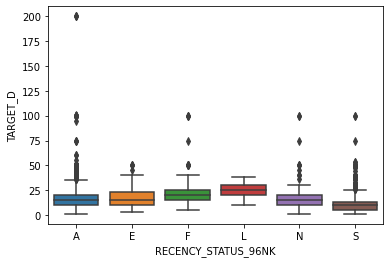

RECENCY_STATUS_96NK
L    24.764706
F    20.904618
N    17.127237
E    17.008130
A    16.906057
S    11.024200
Name: TARGET_D, dtype: float64


In [580]:
plot_categorical("RECENCY_STATUS_96NK", activeDonors)

The highest donors are lapsing donors (L), even though this is a clear minority. Groups A and S, the most frequent donor types, give the lowest amounts with, surprisingly (again), star donors being the lowest donors by a significant margin.

Finally, we can look at the histograms and scatter plots for all of the numerical variables that remain in the dataset.

In [581]:
numVars=[]
for col in donors.columns:
    if donors[col].dtype.name != 'category':
        if col != 'TARGET_D':
            numVars.append(col)

In [582]:
catVars = []
for col in donors.columns:
    if donors[col].dtype.name == 'category':
        if col != 'TARGET_B' or col != 'DONATION_TYPE':
            catVars.append(col)

In [583]:
#sns.pairplot(donors[numVars])

In [584]:
#sns.pairplot(activeDonors[numVars])

### Addressing outliers

We need to find a way to know how many outliers there are for each numerical feature, in this dataset. For that purpose, we will create a function that creates a dictionary with feature name and the number of outliers.

In [585]:
def detect_outliers(data=donors):
    
    outliers = {}
    for i in numVars:
        # find q1 and q3 values
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)

        # compute IRQ
        iqr = q3 - q1

        # find lower and upper bounds
        lower_bound = q1 - (3 * iqr)
        upper_bound = q3 + (3 * iqr)
        
        outList = []
        for x in data[i]:
            if x <= lower_bound or x >= upper_bound:
                outList.append(x)
        
        outliers[i] = len(outList)
    
    return outliers

In [586]:
def outlier_idx(data=donors):
    
    outIndex = []
    for col in numVars:
        # find q1 and q3 values
        q1, q3 = np.percentile(sorted(data[col]), [25, 75])

        # compute IRQ
        iqr = q3 - q1

        # find lower and upper bounds
        lower_bound = q1 - (3 * iqr)
        upper_bound = q3 + (3 * iqr)
        
        outCount = 0
        for x in data[col]:
            if x <= lower_bound or x >= upper_bound:
                if outCount not in outIndex:
                    outIndex.append(outCount)
            outCount += 1
    
    return outIndex

In [587]:
allOuts = detect_outliers()
allOuts

{'DONOR_AGE': 0,
 'MOR_HIT_RATE': 1763,
 'MEDIAN_HOME_VALUE': 813,
 'MEDIAN_HOUSEHOLD_INCOME': 141,
 'PCT_OWNER_OCCUPIED': 0,
 'PER_CAPITA_INCOME': 383,
 'RECENT_AVG_GIFT_AMT': 263,
 'RECENT_CARD_RESPONSE_PROP': 0,
 'RECENT_AVG_CARD_GIFT_AMT': 204,
 'MONTHS_SINCE_LAST_PROM_RESP': 21,
 'LIFETIME_CARD_PROM': 0,
 'LIFETIME_GIFT_AMOUNT': 316,
 'LIFETIME_GIFT_COUNT': 136,
 'LIFETIME_AVG_GIFT_AMT': 257,
 'LIFETIME_GIFT_RANGE': 336,
 'LAST_GIFT_AMT': 419,
 'CARD_PROM_12': 660,
 'MONTHS_SINCE_LAST_GIFT': 185,
 'MONTHS_SINCE_FIRST_GIFT': 0,
 'FILE_CARD_GIFT': 26}

In [588]:
allIndex = outlier_idx()
len(allIndex)

3980

There are a lot of outliers in the dataset, even when we use the outer limits for the bounds. We can't just remove the ~4000 rows that have them because that makes about 20% of the observations in the dataset. We will look deeper into these features and try to remove or treat only the more obvious outliers. Let's start with the variable with the most outliers: `MOR_HIT_RATE`.

In [589]:
uniqueRate = donors['MOR_HIT_RATE'].unique()
len(uniqueRate)

65

Even though the dataset has nearly 19 thousand rows, there are only 65 unique values.

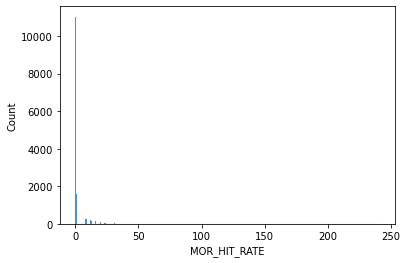

In [590]:
sns.histplot(donors['MOR_HIT_RATE'])
plt.show()

In [591]:
donors['MOR_HIT_RATE'].describe()

count    18918.000000
mean         3.374881
std          9.417808
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        241.000000
Name: MOR_HIT_RATE, dtype: float64

In [592]:
len(donors[donors['MOR_HIT_RATE']>100])

15

It seems that there are a lot of 0 values in this feature that are reducing the quantile values and increasing the number of outliers. There are only 15 values that are higher than 100. We have two options: remove only these two values or convert this feature into a categorical, redefining its definition has "1 if the person has responded to another organization's mail, 0 if they haven't".

 Because the number of 0's in the feature is so high and because we would have to either impute the values or remove the rows from the dataset (which would lead to data loss), we will opt for this second option and convert `MOR_HIT_RATE` into a binary feature.

In [593]:
donors["MOR_HIT_RATE"] = np.where((donors["MOR_HIT_RATE"] != 0), "1", donors["MOR_HIT_RATE"])
donors["MOR_HIT_RATE"] = pd.Categorical(donors["MOR_HIT_RATE"])
donors["MOR_HIT_RATE"].unique()

['0', '1']
Categories (2, object): ['0', '1']

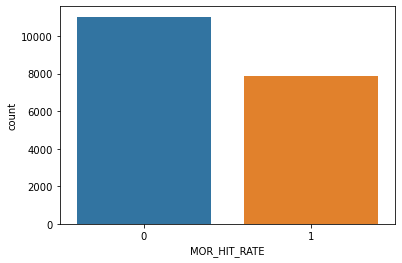

In [594]:
sns.countplot(x=donors['MOR_HIT_RATE'])
plt.show()

In [595]:
numVars=[]
for col in donors.columns:
    if donors[col].dtype.name != 'category':
        if col != 'TARGET_D':
            numVars.append(col)

In [596]:
catVars = []
for col in donors.columns:
    if donors[col].dtype.name == 'category':
        if col != 'TARGET_B' or col != 'DONATION_TYPE':
            catVars.append(col)

In [597]:
allOuts = detect_outliers(donors)
allOuts

{'DONOR_AGE': 0,
 'MEDIAN_HOME_VALUE': 813,
 'MEDIAN_HOUSEHOLD_INCOME': 141,
 'PCT_OWNER_OCCUPIED': 0,
 'PER_CAPITA_INCOME': 383,
 'RECENT_AVG_GIFT_AMT': 263,
 'RECENT_CARD_RESPONSE_PROP': 0,
 'RECENT_AVG_CARD_GIFT_AMT': 204,
 'MONTHS_SINCE_LAST_PROM_RESP': 21,
 'LIFETIME_CARD_PROM': 0,
 'LIFETIME_GIFT_AMOUNT': 316,
 'LIFETIME_GIFT_COUNT': 136,
 'LIFETIME_AVG_GIFT_AMT': 257,
 'LIFETIME_GIFT_RANGE': 336,
 'LAST_GIFT_AMT': 419,
 'CARD_PROM_12': 660,
 'MONTHS_SINCE_LAST_GIFT': 185,
 'MONTHS_SINCE_FIRST_GIFT': 0,
 'FILE_CARD_GIFT': 26}

With `MOR_HIT_RATE` out of the way, the next biggest offender when it comes to outliers is `MEDIAN_HOME_VALUE`.

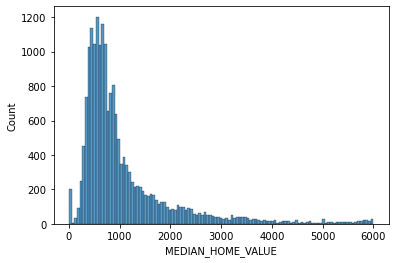

In [598]:
sns.histplot(donors['MEDIAN_HOME_VALUE'])
plt.show()

In [599]:
donors['MEDIAN_HOME_VALUE'].describe()

count    18918.000000
mean      1079.084628
std        960.941727
min          0.000000
25%        516.000000
50%        745.000000
75%       1225.750000
max       6000.000000
Name: MEDIAN_HOME_VALUE, dtype: float64

In [600]:
len(donors[donors['MEDIAN_HOME_VALUE']==0])

205

There are 205 `MEDIAN_HOME_VALUE` values equal to 0. This is clearly a mistake and we need to do something about it. We can treat these values like we did with missing values and replace them with the median `MEDIAN_HOME_VALUE` value - 745.

In [601]:
donors["MEDIAN_HOME_VALUE"] = np.where((donors["MEDIAN_HOME_VALUE"] == 0), 
                                       donors['MEDIAN_HOME_VALUE'].median(), 
                                       donors["MEDIAN_HOME_VALUE"])

In [602]:
donors['MEDIAN_HOME_VALUE'].describe()

count    18918.000000
mean      1087.157628
std        954.952726
min         75.000000
25%        528.000000
50%        745.000000
75%       1225.750000
max       6000.000000
Name: MEDIAN_HOME_VALUE, dtype: float64

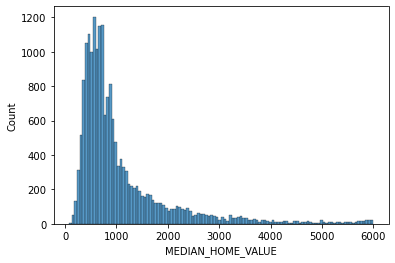

In [603]:
sns.histplot(donors['MEDIAN_HOME_VALUE'])
plt.show()

There doesnt seem to be any more values that differ much from the distribution (even if there is a slight increase in `MEDIAN_HOME_VALUE` for the highest values). We can move on to the next feature - `MEDIAN_HOUSEHOLD_INCOME`.

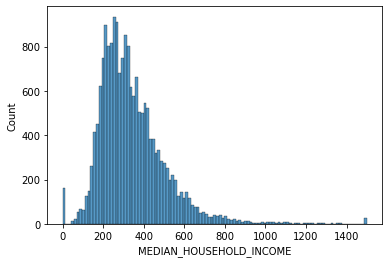

In [604]:
sns.histplot(donors['MEDIAN_HOUSEHOLD_INCOME'])
plt.show()

`MEDIAN_HOUSEHOLD_INCOME` also has 0 values and it shouldn't. We will, again, impute the median on this values. We will also treat the more obvious outliers, where `MEDIAN_HOUSEHOLD_INCOME` has values higher than 1400.

In [605]:
highestOuts = list(donors[donors['MEDIAN_HOUSEHOLD_INCOME']>1400].index)

for i in donors.index:
    if i in highestOuts:
        donors['MEDIAN_HOUSEHOLD_INCOME'][i] = donors['MEDIAN_HOUSEHOLD_INCOME'].median()

C:\Users\filip\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [606]:
donors["MEDIAN_HOUSEHOLD_INCOME"] = np.where((donors["MEDIAN_HOUSEHOLD_INCOME"] == 0), 
                                       donors['MEDIAN_HOUSEHOLD_INCOME'].median(), 
                                       donors["MEDIAN_HOUSEHOLD_INCOME"])

In [607]:
donors["MEDIAN_HOUSEHOLD_INCOME"].describe()

count    18918.000000
mean       342.923248
std        155.350920
min         50.000000
25%        234.000000
50%        311.000000
75%        416.000000
max       1395.000000
Name: MEDIAN_HOUSEHOLD_INCOME, dtype: float64

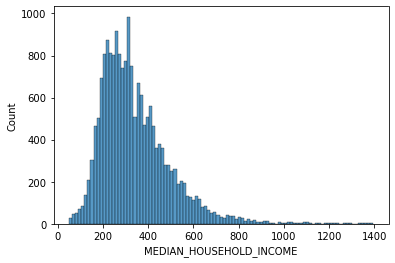

In [608]:
sns.histplot(donors['MEDIAN_HOUSEHOLD_INCOME'])
plt.show()

In [609]:
allOuts = detect_outliers(donors)
allOuts

{'DONOR_AGE': 0,
 'MEDIAN_HOME_VALUE': 832,
 'MEDIAN_HOUSEHOLD_INCOME': 116,
 'PCT_OWNER_OCCUPIED': 0,
 'PER_CAPITA_INCOME': 383,
 'RECENT_AVG_GIFT_AMT': 263,
 'RECENT_CARD_RESPONSE_PROP': 0,
 'RECENT_AVG_CARD_GIFT_AMT': 204,
 'MONTHS_SINCE_LAST_PROM_RESP': 21,
 'LIFETIME_CARD_PROM': 0,
 'LIFETIME_GIFT_AMOUNT': 316,
 'LIFETIME_GIFT_COUNT': 136,
 'LIFETIME_AVG_GIFT_AMT': 257,
 'LIFETIME_GIFT_RANGE': 336,
 'LAST_GIFT_AMT': 419,
 'CARD_PROM_12': 660,
 'MONTHS_SINCE_LAST_GIFT': 185,
 'MONTHS_SINCE_FIRST_GIFT': 0,
 'FILE_CARD_GIFT': 26}

In [610]:
allIndex = outlier_idx()
len(allIndex)

2474

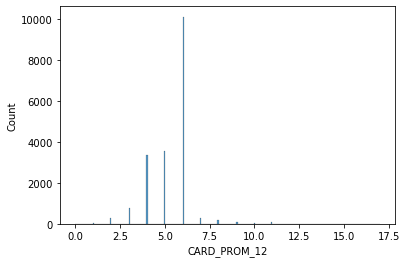

In [611]:
# CARD_PROM_12
sns.histplot(donors['CARD_PROM_12'])
plt.show()

In [612]:
donors['CARD_PROM_12'].unique()

array([ 7, 11,  6,  9,  4,  8,  5, 10,  2,  3, 12, 13, 17,  1, 15, 14,  0],
      dtype=int64)

There are only 17 different values in this feature. Converting it into a categorical variable is probably a good approach. However, we need to do some bining as 17 classes is too much. Seeing as 6 is the value for the majority, this is a good dividing point - we can create 2 classes: <6 and >=6 cards.

In [613]:
donors['CARD_PROM_12'].describe()

count    18918.000000
mean         5.358812
std          1.250308
min          0.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         17.000000
Name: CARD_PROM_12, dtype: float64

In [614]:
donors["CARD_PROM_12"] = np.where((donors["CARD_PROM_12"] >= 6), 
                                       "6+", 
                                       donors["CARD_PROM_12"])

In [615]:
donors["CARD_PROM_12"] = np.where((donors["CARD_PROM_12"] < "6"), 
                                       "<6", 
                                       donors["CARD_PROM_12"])

In [616]:
donors["CARD_PROM_12"] = pd.Categorical(donors["CARD_PROM_12"])
donors["CARD_PROM_12"].unique()

['6+', '<6']
Categories (2, object): ['6+', '<6']

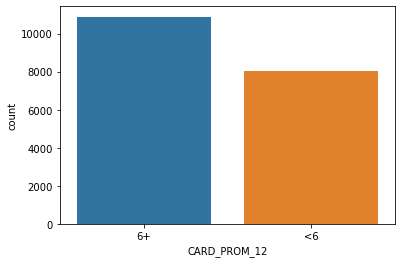

In [617]:
sns.countplot(x=donors['CARD_PROM_12'])
plt.show()

In [619]:
numVars=[]
for col in donors.columns:
    if donors[col].dtype.name != 'category':
        if col != 'TARGET_D':
            numVars.append(col)

In [620]:
catVars = []
for col in donors.columns:
    if donors[col].dtype.name == 'category':
        if col != 'TARGET_B' or col != 'DONATION_TYPE':
            catVars.append(col)

In [621]:
outliers = outlier_idx()
len(outliers)

1934

In [622]:
allOuts = detect_outliers(donors)
allOuts

{'DONOR_AGE': 0,
 'MEDIAN_HOME_VALUE': 832,
 'MEDIAN_HOUSEHOLD_INCOME': 116,
 'PCT_OWNER_OCCUPIED': 0,
 'PER_CAPITA_INCOME': 383,
 'RECENT_AVG_GIFT_AMT': 263,
 'RECENT_CARD_RESPONSE_PROP': 0,
 'RECENT_AVG_CARD_GIFT_AMT': 204,
 'MONTHS_SINCE_LAST_PROM_RESP': 21,
 'LIFETIME_CARD_PROM': 0,
 'LIFETIME_GIFT_AMOUNT': 316,
 'LIFETIME_GIFT_COUNT': 136,
 'LIFETIME_AVG_GIFT_AMT': 257,
 'LIFETIME_GIFT_RANGE': 336,
 'LAST_GIFT_AMT': 419,
 'MONTHS_SINCE_LAST_GIFT': 185,
 'MONTHS_SINCE_FIRST_GIFT': 0,
 'FILE_CARD_GIFT': 26}

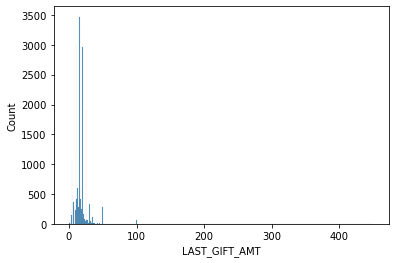

In [623]:
# LAST_GIFT_AMT
sns.histplot(donors['LAST_GIFT_AMT'])
plt.show()

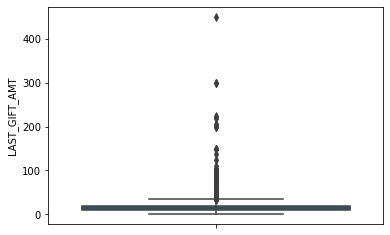

In [624]:
sns.boxplot(y=donors['LAST_GIFT_AMT'])
plt.show()

In [633]:
len(donors[donors['LAST_GIFT_AMT']>150])

10

In [627]:
donors['LAST_GIFT_AMT'].describe()

count    18918.000000
mean        16.534813
std         11.593422
min          0.000000
25%         10.000000
50%         15.000000
75%         20.000000
max        450.000000
Name: LAST_GIFT_AMT, dtype: float64

In [ ]:
valCount1 = donors.shape[0]*donors.shape[1]

In [ ]:
sumD = sum(allOuts.values())
round((sumD / valCount1) * 100,2)

In [ ]:
valCount2 = activeDonors.shape[0]*activeDonors.shape[1]

In [ ]:
sumA = sum(activeOuts.values())
round((sumA / valCount2) * 100,2)

When it comes to active donors, there are fewer outliers (no doubt the effect of removing the 0's from `TARGET_D`).

There are quite a lot of outliers, even considering a bound value of 3. We will not address them at this moment and we'll keep them for now. We might need to reconsider this strategy if the models' performances are not satisfatory.

### Addressing class imbalances

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = donors[donors['TARGET_B']==0]
df_minority = donors[donors['TARGET_B']==1]


# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=14215,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.TARGET_B.value_counts()

# Visualizing new balance
sns.countplot(x=df_upsampled['TARGET_B'])
plt.show()

In [ ]:
df_upsampled

In [ ]:
df_upsampled.TARGET_B.value_counts()

# Task 1 (Supervised Learning) - Predicting Donation and Donation Type

In this task you should target 3 classification tasks:
1. **Predicting  Donation (binary classification task)** - TARGET_B - Hugo; 
2. **Predicting Donation TYPE (multiclass classification)** - DONATION_TYPE - Paulo; and
3. **Train specialized models for SES (socioeconomic classification)** - SES - Filipe.

**You should:**

* Choose **one classifier in each category**: Tree models, Rule models, Linear models, Distance-based models, and Probabilistic models.
* Use cross-validation to evaluate the results. 
* Present and discuss the results for different evaluation measures, present confusion matrices. Remember that not only overall results are important. Check what happens when learning to predict each class.
* Describe the parameters used for each classifier and how their choice impacted or not the results.
* Choose the best classifier and fundament you choice.
* **Discuss critically your choices and the results!**

## 1.1. Preprocessing Data for Classification

In [ ]:
donors = df_upsampled

In [ ]:
donors

### Handling Categorical Features

with `get_dummies` pandas function

In [ ]:
df_y=donors["DONATION_TYPE"]
del donors["DONATION_TYPE"]

In [ ]:
df_X=pd.get_dummies(donors, drop_first=True)
df_X

In [ ]:
df_X.rename(columns={"TARGET_B_1": "TARGET_B"}, inplace=True)
df_X.rename(columns={"IN_HOUSE_1": "IN_HOUSE"}, inplace=True)
df_X.rename(columns={"PUBLISHED_PHONE_1": "PUBLISHED_PHONE"}, inplace=True)
df_X.rename(columns={"PEP_STAR_1": "PEP_STAR"}, inplace=True)

df_X

## Predicting Donation (binary classification task) - TARGET_B

In [ ]:
df_Y=df_X["TARGET_B"]

df_X = df_X.drop(["TARGET_B"], axis=1)
df_X = df_X.drop(["TARGET_D"], axis=1)

### Tree Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, random_state=0, test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier() 

dt.fit(X_train, y_train)

dt

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = dt.predict(X_test)

print("Accuracy on train set:",  dt.score(X_train, y_train))
print("Accuracy on test set:",  dt.score(X_test, y_test))

cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=dt.classes_,
            yticklabels=dt.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix - Test Set')

As expected, the accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data.

The test set accuracy is  worse around 63% which is low. 

This discrepancy between performance on the training set and the test set is a clear sign of overfitting.(?)

If we don't restric the depth of the decission tree it can grow deep and complex.  One option is to stop building the tree after a certain depth has been reached.




### Parameters
* max_depth (analisar valor muito grande ??)

The first parameter is max_depth. Indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 45))
accuracy = []
for depth in max_depth_range:    
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)    
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    
fig, ax = plt.subplots()
ax.plot(max_depth_range, accuracy)
ax.set(xlabel='max_depth)', ylabel='accuracy',
       title='')
ax.grid()
plt.show()

Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = { 'max_depth' :
list(range(1, 40)) }
grid_search = GridSearchCV(dt,param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=33, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy on train set:",  dt.score(X_train, y_train) *100)
print("Accuracy on test set:",  dt.score(X_test, y_test) *100)

cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=dt.classes_,
            yticklabels=dt.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix - Test Set')

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()
knn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, random_state=0, test_size=0.20)

knn.fit(X_train, y_train)


print("Accuracy on train set:",  knn.score(X_train, y_train))
print("Accuracy on test set:",  knn.score(X_test, y_test))

y_test_pred = knn.predict(X_test)

In [ ]:
test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix - Test Set')

In [ ]:
from sklearn import metrics
k_range = range(1,10)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(k_range,scores_list)
plt.xlabel('Value of k for knn')
plt.ylabel('Testing Accuracy')

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = { 'n_neighbors' :
list(range(1, 10)) }
grid_search = GridSearchCV(knn,param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
knn.fit(X_train, y_train)


print("Accuracy on train set:",  knn.score(X_train, y_train))
print("Accuracy on test set:",  knn.score(X_test, y_test))

y_test_pred = knn.predict(X_test)

test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix - Test Set')

## NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, random_state=0, test_size=0.20)

gnb = gnb.fit(X_train, y_train)


gnb.predict_proba(X_train)

pd.DataFrame(gnb.predict_proba(X_train), columns=gnb.classes_)

print("Accuracy on training set:",  gnb.score(X_train, y_train))

y_train_pred = gnb.predict(X_train)

In [ ]:
y_test_pred = gnb.predict(X_test)
print("Accuracy on test set:",  gnb.score(X_test, y_test))
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=gnb.classes_,
            yticklabels=gnb.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix - Test Set')

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {  }
grid_search = GridSearchCV(gnb,param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

## LINEAR MODEL

In [ ]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, random_state=0, test_size=0.20)

lsvm = LinearSVC(max_iter=5000)
lsvm = lsvm.fit(X_train, y_train)



In [ ]:
print("Training set score =", lsvm.score(X_train, y_train))
print("Test set score: =", lsvm.score(X_test, y_test))

In [ ]:
y_train_pred = lsvm.predict(X_train)
y_test_pred = lsvm.predict(X_test)
print("Accuracy on test set:",  lsvm.score(X_test, y_test))
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=gnb.classes_,
            yticklabels=gnb.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix - Test Set')

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

s = cross_val_predict(lsvm,df_X,df_Y,cv=5)


In [ ]:
s.mean()

## 1.2  Predicting DONATION_TYPE - Multiclass Classification 

We will now do the classification of multiclass feature target "DONATION_TYPE".

We beging this task by enconding the necessary features in order to be able to run the classification models.
Then we will run one algorithm to build our classifier. This will be done five times and we will use a diferent
algorithm for each type of classifier.

Cross validation will be used for each result in order to enhance our models.


### Pre-Processing Data

In [ ]:
## 11 Dez 2020
activeDonors1 = activeDonors
activeDonors.head(10)

### Data Encoding Process : 

Since we are delaing with a dataframe which has several features as categorical data, we need to encode these features to 
perform the classification.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_TARGET_B = LabelEncoder()        
le_IN_HOUSE = LabelEncoder()                         
le_URBANICITY = LabelEncoder()          
le_SES = LabelEncoder()                              
le_HOME_OWNER = LabelEncoder()                 
le_DONOR_GENDER = LabelEncoder()         
le_PUBLISHED_PHONE = LabelEncoder()       
le_OVERLAY_SOURCE = LabelEncoder()    
le_PEP_STAR = LabelEncoder()
le_RECENCY_STATUS_96NK = LabelEncoder()         
le_DONATION_TYPE =  LabelEncoder()


In [ ]:
activeDonors1['TARGET_B'] = le_TARGET_B.fit_transform(activeDonors['TARGET_B'])
activeDonors1['IN_HOUSE'] = le_IN_HOUSE.fit_transform(activeDonors['IN_HOUSE'])
activeDonors1['URBANICITY'] = le_URBANICITY.fit_transform(activeDonors['URBANICITY'])
activeDonors1['SES'] = le_SES.fit_transform(activeDonors['SES'])
activeDonors1['HOME_OWNER'] = le_HOME_OWNER.fit_transform(activeDonors['HOME_OWNER'])
activeDonors1['DONOR_GENDER'] = le_DONOR_GENDER.fit_transform(activeDonors['DONOR_GENDER'])
activeDonors1['PUBLISHED_PHONE'] = le_PUBLISHED_PHONE.fit_transform(activeDonors['PUBLISHED_PHONE'])
activeDonors1['OVERLAY_SOURCE'] = le_OVERLAY_SOURCE.fit_transform(activeDonors['OVERLAY_SOURCE'])
activeDonors1['PEP_STAR'] = le_PEP_STAR.fit_transform(activeDonors['PEP_STAR'])
activeDonors1['RECENCY_STATUS_96NK'] = le_RECENCY_STATUS_96NK.fit_transform(activeDonors['RECENCY_STATUS_96NK'])
activeDonors1['DONATION_TYPE'] = le_DONATION_TYPE.fit_transform(activeDonors['DONATION_TYPE'])


Once the dataframe has been encoded, we will define the variables needed for the Multiclass Classification.

Being so, we will define our target as the "DONATION_TYPE" and the input will be the remainder of the dataframe.

In [ ]:
input = activeDonors1.drop('DONATION_TYPE', axis='columns')
target = activeDonors1["DONATION_TYPE"]

In [ ]:
target.head(4)

Now that the data ( ie: Input and Target values) are well defined and properlly encoded, we will proceed to build the models. 

**The chosen classifiers algorithms for each category are the following:**

1) Linear models : SVM Model 

2) Probabilistic models : Naive-Bayes Model

3) Tree model : Decision Tree

4) Distance-based models : KNN Model

5) Rule models : Apriori model


### Linear model for Multiclass Classification : SVM Model

The first model will be the SVM. And since we are dealing with multiclass data classification, we will use the One-vs_Rest and the One-vs_One technique.

In [ ]:
#####################################################################################################
# 1.1) Linear models : SVM Model Multiclass Classifier using a one-vs-rest --> FINAL 08/12/2020
#####################################################################################################
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import train_test_split 
import warnings 
warnings.filterwarnings('ignore')    
# Loading the dataset 
X = input 
y = target
# Splitting the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 42)   
# Creating the SVM model 
modelo = OneVsRestClassifier(SVC())    
# Fitting the model with training data 
modelo.fit(X_train, y_train)    
# Making a prediction on the test set 
prediction = modelo.predict(X_test) 
# Evaluating the model 
print(f"Test Set Accuracy : {accuracy_score( y_test, prediction) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}") 


In [ ]:
#####################################################################################################
# 1.2) Linear models : SVM Model Multiclass Classifier One-Vs-One  --> FINAL 08/12/2020
#####################################################################################################
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
import warnings 
warnings.filterwarnings('ignore') 
X = input 
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 42)
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}") 

In [ ]:
De seguida vamos fazer cross-validation e comparar os resultados

In [ ]:
############ SVM MODEL CROSS VALIDATION ---> FINAL @09_12_2020 #
# 
###################################################
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 10-fold cross validation
scores = cross_val_score(SVM, X, y, cv=10)
print ( "Cross-validated scores: ", scores)

#### SVM Model Results Sumary : 

So, as expected, the cross-validation provided a slightly better result. 

    SVM One-vs-One (without Cross Validation) = 0.2904608788853162

    SVM One-vs-One (with Cross Validation) = 0.29184549


### Probabilistic models for Multiclass Classification : Naive-Bayes

Our next model will be  a Probabilistic model, being so we will use Naive Bayes.


In [ ]:
############################# NAIVE BAYES ############################################################
#  2) Probabilistic models : Naive-Bayes Model
#####################################################################################################
# importing necessary libraries 

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split   

# train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

In [ ]:
############ Naive Bayes MODEL CROSS VALIDATION ---> FINAL @09_12_2020 #
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# https://www.aionlinecourse.com/tutorial/machine-learning/k-fold-cross-validation
###################################################
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 10-fold cross validation
scores = cross_val_score(gnb, X, y, cv=10)
print ( "Cross-validated scores: ", scores)

#### Naive Bayes Model Results Sumary : 

So, as expected, the cross-validation provided a slightly better result. 

    Naive Bayes (without Cross Validation) = 0.8808911739502999

    Naive Bayes (with Cross Validation) = 0.92963753


### Distance-based models for Multiclass Classification : KNN

We will now build a Distance-based models using the KNN algorithm.


In [ ]:
################################### KNN #######################################################
#
###############################################################################################
# importing necessary libraries 

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)  ## 5 = A+B+C+D+E
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print (accuracy) 
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

In [ ]:
############ KNN MODEL CROSS VALIDATION ---> FINAL @09_12_2020 #
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# https://www.aionlinecourse.com/tutorial/machine-learning/k-fold-cross-validation
###################################################
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(knn, X, y, cv=10)
print ( "Cross-validated scores: ", scores)

#### KNN Model Results Sumary : 

Again the cross-validation gave us improved result. 

    KNN result (without Cross Validation) = 0.27849185946872324

    KNN result (with Cross Validation) = 0.29399142


### Tree models for Multiclass Classification : Decision Tree

Next we will run a Tree mode. For this purpose we will use Decision Tree.

In [ ]:
############################## TREE MODEL  ---> FINAL @09_12_2020################
#  
#################################################################################
# importing necessary libraries 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  
# train and test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training the Classifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))


In [ ]:
tree.plot_tree(dtree_model)

In [ ]:
############ TREE MODEL CROSS VALIDATION ---> FINAL @09_12_2020 #
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# https://www.aionlinecourse.com/tutorial/machine-learning/k-fold-cross-validation
###################################################
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(dtree_model, X, y, cv=10)
print ( "Cross-validated scores: ", scores)

#### Decision Tree Model Results Sumary :
    
The final results for compariosn are the following :

    Decision Tree (without Cross Validation) = 0.7977720651242503

    Decision Tree (with Cross Validation) = 0.80128205

In [ ]:
activeDonors.shape

### Rule models for Multiclass Classification  : Apriori Algorithm

The last model to be built will be the Rule based Model. For this we will use the Apriori Algorithm.

In [ ]:
############################### RULES MODEL - APRIORI ################
# 
######################################################################
activeDonors.shape
transactions = []
for i in range(0, activeDonors.shape[0]):
    transactions.append([str(activeDonors.values[i, j]) for j in range(0, 42)])


In [ ]:
print(transactions[0])

In [ ]:
We will now see the Rules/Relations : 
results = list(rules)

...

...

## 1.3 Specialized models for SES

### Splitting dataset by SES class

In [ ]:
donors["SES"].unique()

In [ ]:
ses1 = donors[donors["SES"]==1].drop("TARGET_D", axis=1)
ses2 = donors[donors["SES"]==2].drop("TARGET_D", axis=1)
ses3 = donors[donors["SES"]==3].drop("TARGET_D", axis=1)
ses4 = donors[donors["SES"]==4].drop("TARGET_D", axis=1)

In [ ]:
ses1

In [ ]:
ses2

In [ ]:
ses3

In [ ]:
ses4

## 1.4. Classification - Results and Discussion 

...

# Task 2 (Unsupervised Learning) - Characterizing Donors and Donation Type

In this task you should **use unsupervised learning algorithms and try to characterize donors (people who really did a donation) and their donation type**. You can use:
* **Association rule mining** to find **associations between the features and the target Donation/DonationTYPE**.
* **Clustering algorithms to find similar groups of donors**. Is it possible to find groups of donors with the same/similar DonationTYPE?
* **Be creative and define your own unsupervised analysis!** What would it be interesting to find out ?

## 2.1. Preprocessing Data for Association Rule Mining

In [ ]:
activeDonors2 = activeDonors.drop("TARGET_D", axis=1) 

In [ ]:
activeDonors2

In [ ]:
activeDonors2.reset_index(inplace=True, drop=True)

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(activeDonors2.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
catVars = []
for col in activeDonors2.columns:
    if activeDonors2[col].dtype.name == "category":
        catVars.append(col)

catVars

In [ ]:
activeCat = activeDonors2[catVars]

In [ ]:
#activeCat = activeCat.drop("TARGET_B", axis=1)

In [ ]:
vals = activeCat.values.tolist()

In [ ]:
activeCat.columns

### Converting every value to string

There are currently non-string values in the values list. We also should translate 'numerical' strings them to strings that can be understood without looking at the dataframe.

In [ ]:
for row in vals:
    for i in range(len(row)):
        row[i] = str(row[i])
        
vals[0]

In [ ]:
# target-b values - i=0
for item in vals:
    if item[0] == '1':
        item[0] = 'donor'
    else:
        item[0] = 'non-donor'

In [ ]:
# in-house values - i=1
for item in vals:
    if item[1] == '1':
        item[1] = 'inhouse'
    else:
        item[1] = 'not-inhouse'

In [ ]:
# urbanicity values - C, R, S, U, T - i=2
for item in vals:
    if item[2] == 'C':
        item[2] = 'city'
    elif item[2] == 'R':
        item[2] = 'rural'
    elif item[2] == 'T':
        item[2] = 'town'
    elif item[2] == 'S':
        item[2] = 'suburban'
    else:
        item[2] = 'urban'

In [ ]:
# ses values - i=3
for item in vals:
    if item[3] == '1':
        item[3] = 'ses1'
    elif item[3] == '2':
        item[3] = 'ses2'
    elif item[3] == '3':
        item[3] = 'ses3'
    else:
        item[3] = 'ses4'

In [ ]:
# home-owner values - i=4
for item in vals:
    if item[4] == 'H':
        item[4] = 'homeowner'
    else:
        item[4] = 'unknown'

In [ ]:
# donor_gender values - i=5
for item in vals:
    if item[5] == 'M':
        item[5] = 'male'
    elif item[5] == 'F':
        item[5] = 'female'
    else:
        item[5] = 'unknown'

In [ ]:
# published_phone values - i=6
for item in vals:
    if item[6] == '0':
        item[6] = 'not-published'
    else:
        item[6] = 'pub_phone'

In [ ]:
# overlay_source values - i=7
for item in vals:
    if item[7] == 'P':
        item[7] = 'polk'
    elif item[7] == 'M':
        item[7] = 'metromail'
    elif item[7] == 'N':
        item[7] = 'no_source'
    else:
        item[7] = 'polk+metro'

In [ ]:
# pep-star values - i=8
for item in vals:
    if item[8] == '0':
        item[8] = 'non-star'
    else:
        item[8] = 'star_donor'

In [ ]:
# recent_status values - i=-2
for item in vals:
    if item[-2] == 'A':
        item[-2] = 'active'
    elif item[-2] == 'S':
        item[-2] = 'star'
    elif item[-2] == 'N':
        item[-2] = 'new'
    elif item[-2] == 'E':
        item[-2] = 'inactive'
    elif item[-2] == 'L':
        item[-2] = 'lapsing'
    else:
        item[-2] = 'first-time'

In [ ]:
# recent_status values - i=-1
for item in vals:
    if item[-1] == 'A':
        item[-1] = 'dontype_A'
    elif item[-1] == 'B':
        item[-1] = 'dontype_B'
    elif item[-1] == 'C':
        item[-1] = 'dontype_C'
    elif item[-1] == 'D':
        item[-1] = 'dontype_D'
    else:
        item[-1] = 'dontype_E'

In [ ]:
vals[0]

## 2.2. Finding Associations

### Transforming vals dataframe to a binary database

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(vals).transform(vals)
binary_database = pd.DataFrame(te_ary, columns=te.columns_)
binary_database

### Identifying frequent itemsets using Apriori

In [ ]:
from mlxtend.frequent_patterns import apriori

#Compute itemsets with min_support = 50%
frequent_itemsets = apriori(binary_database, min_support=0.5, use_colnames=True)
frequent_itemsets

## 2.3 Association Rules - Results and Discussion 

In [ ]:
from mlxtend.frequent_patterns import association_rules
# Generate association rules with confidence >= 90%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
rules

In [ ]:
# add new column length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

# filter using pattern length = 2
frequent_2_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]
frequent_2_itemsets.sort_values('support', ascending=False)

After rule association mining, we can identify some associations for `TARGET_B`:
+ `IN_HOUSE`: people who have NEVER donated to the in-house program are more likely to donate.
+ `DONOR_GENDER`: women are more likely to donate.
+ `PEP_STAR`: star donors are more likely to donate.
+ `RECENCY_STATUS_96NK`: active donors are more likely to donate.
+ `HOME_OWNER`: homeowners are more likely to donate.
+ `PUBLISHED_PHONE`: people who do NOT have their phone published are more likely to donate.

There doesn't seem to be any association between features and a particular donation type.

## 2.4. Preprocessing Data for Clustering

In [ ]:
activeDonors.reset_index(inplace=True, drop=True)

In [ ]:
# saving donation type labels for later and removing it from activeDonors
donation_type = activeDonors.pop("DONATION_TYPE")

In [ ]:
# dropping TARGET_B and TARGET_D
dfCluster = activeDonors.drop(["TARGET_B", "TARGET_D"], axis=1)

In [ ]:
# Identifying categorical variables
catVars = []
for col in dfCluster.columns:
    if dfCluster[col].dtype.name == "category":
        catVars.append(col)
        
# Identifying numerical variables
numVars = []
for col in dfCluster.columns:
    if dfCluster[col].dtype.name != "category":
        numVars.append(col)

### Scaling numerical data

As we have vastly different ranges for the numerical data, it is important to scale every value to the same range (0 for the minimum, 1 for the maximum).

In [ ]:
#Scaling numerical data
clusterNum = dfCluster[numVars]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(clusterNum)

# creating a scaled dataframe
dfScaled = pd.DataFrame(scaled)
dfScaled.columns = clusterNum.columns
dfScaled

### One-hot encoding categorical variables

In [ ]:
# Using get_dummies
clusterCat = dfCluster[catVars]
clusterCat = pd.get_dummies(clusterCat, drop_first=True)

# converting every value to categorical
for col in clusterCat.columns:
    clusterCat[col] = pd.Categorical(clusterCat[col])

In [ ]:
# merging numerical and categorical dataframes
finalDF = dfScaled
for col in clusterCat:
    finalDF[col]=clusterCat[col]
finalDF

In [ ]:
finalDF.dtypes

## 2.5. Finding Groups

### K-Means

In [ ]:
from sklearn.cluster import KMeans

# Defining n_clusters=5 because that's the number of donation types
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans

In [ ]:
# Train K-means
kmeans = kmeans.fit(df4)

In [ ]:
kmlabels = kmeans.labels_
kmlabels

In [ ]:
dontypes = donation_type.values

# counting number of elements in each donation type
types=['A', 'B', 'C', 'D', 'E']
typeCount = {}
for tipo in types:
    count=0
    for val in dontypes:
        if tipo == val:
            count+=1
    typeCount[tipo]=count

typeCount

In [ ]:
# counting number of elements in each knn label
kmtypes=[0, 1, 2, 3, 4]
kmCount = {}
for tipo in kmtypes:
    count=0
    for val in kmlabels:
        if tipo == val:
            count+=1
    kmCount[tipo]=count

kmCount

There are some differences in the number of elements in each group. The most obvious is that there is no group, after kmeans, with as many elements as group A (the smallest group has 656 elements).

### Hierarchical

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hca = AgglomerativeClustering(linkage ="average", n_clusters=5)
hca

In [ ]:
# Grow the cluster hierarchy until K = 5
hca = hca.fit(df4)

In [ ]:
# Cluster memmberships
hca.labels_

## 2.6. Clustering - Results and Discussion 

### K-Means

In [ ]:
activeDonors3 = activeDonors.drop(["TARGET_B"],axis=1)
activeDonors3['DONATION_TYPE'] = donation_type
activeDonors3['K-MEANS'] = kmlabels

In [ ]:
group0 = activeDonors3[activeDonors3['K-MEANS']==0]
sns.countplot(x='DONATION_TYPE', data=group0)

In [ ]:
group0.describe()

In [ ]:
group0.describe(include=['object', 'category'])

Group 0 is very balanced when it comes to donation types. Most of these donors are active, homeowners, have their phone published and were matched against both sources. They have a mean donation amount of 15, a solid amount.

In [ ]:
group1 = activeDonors3[activeDonors3['K-MEANS']==1]
sns.countplot(x='DONATION_TYPE', data=group1)

In [ ]:
group1.describe()

In [ ]:
group1.describe(include=['object', 'category'])

In [ ]:
group2 = activeDonors3[activeDonors3['K-MEANS']==2]
sns.countplot(x='DONATION_TYPE', data=group2)

In [ ]:
group2.describe()

In [ ]:
group2.describe(include=['object', 'category'])

In [ ]:
group3 = activeDonors3[activeDonors3['K-MEANS']==3]
sns.countplot(x='DONATION_TYPE', data=group3)

In [ ]:
group3.describe()

In [ ]:
group3.describe(include=['object', 'category'])

In [ ]:
group4 = activeDonors3[activeDonors3['K-MEANS']==4]
sns.countplot(x='DONATION_TYPE', data=group4)

In [ ]:
group4.describe()

In [ ]:
group4.describe(include=['object', 'category'])

In [ ]:
kmGroups = [group0, group1, group2, group3, group4]
for group in kmGroups:
    sns.countplot(x='DONATION_TYPE', data=group)
    plt.show()

### Hierarchical

In [ ]:
activeDonors3['HIERARCH']=hca.labels_

In [ ]:
hc0 = activeDonors3[activeDonors3['HIERARCH']==0]
hc1 = activeDonors3[activeDonors3['HIERARCH']==1]
hc2 = activeDonors3[activeDonors3['HIERARCH']==2]
hc3 = activeDonors3[activeDonors3['HIERARCH']==3]
hc4 = activeDonors3[activeDonors3['HIERARCH']==4]

In [ ]:
hcGroups = [hc0, hc1, hc2, hc3, hc4]
for group in hcGroups:
    sns.countplot(x='DONATION_TYPE', data=group)
    plt.show()

# 3. Final Comments and Conclusions